**Phase 1**

In [1]:
class Pretty():
    def gen_table(self,df_1,title=None):
        x = PrettyTable()
        df_1 = df_1.round(3)
        if isinstance(df_1,pd.DataFrame):
            x.field_names=list(df_1.columns)
            for i in range(len(df_1)):
                x.add_row(df_1.iloc[i])
            if title is not None:
                print(x.get_string(title=title))
            else:
                print(x)
        else:
            print(df_1)
        return x

In [2]:
pip freeze

absl-py==2.0.0
aiobotocore @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_71xswk40o_/croot/aiobotocore_1682537536268/work
aiofiles @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_f56ag8l7kr/croot/aiofiles_1683773599608/work
aiohttp @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_76kcgwehai/croot/aiohttp_1694181098663/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_3d75lecab1/croot/aiosqlite_1683773918307/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anyio @ file:///Users/cbousseau/work/recipes/ci_py311/anyio_1677917528418/work/dist
appdirs==1.4.4
applaunchservices @ file:///Users/cbousseau/work/recipes/ci_py311/applaunchservices_1677955996025/work
appnope @ file:///Users/cbousseau/work/recipes/ci_py311/appnope_1677917

In [3]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# from imblearn.under_sampling import RandomUnderSampler
from prettytable import PrettyTable
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc

Reading Data from CSV

In [5]:
df = pd.read_csv('combined_csv.csv')
df.head()

,Unnamed: 0,OccupancyDateTime,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingRate,ParkingCategory,Latitude,...,class,type,date_category,rate_category,time_limit_category,weather_category,humidity_category,precip_category,snow_category,holiday_category
0,0,2015-01-15 12:15:00,1,NE,10202,240,22,4.0,Paid Parking,47.608585,...,highway,construction,Weekday,High,Medium,Cold,Medium,No Rain,No Snow,False
1,1,2015-01-16 17:01:00,1,NW,94421,240,7,4.0,Paid Parking,47.608350,...,man_made,bioswale,Weekday,High,Medium,Cold,Medium,No Rain,No Snow,False
2,2,2015-01-15 11:19:00,1,NW,94421,240,7,4.0,Paid Parking,47.608350,...,man_made,bioswale,Weekday,High,Medium,Cold,Medium,No Rain,No Snow,False
3,3,2015-01-15 11:51:00,9,NW,80177,240,8,4.0,Paid Parking,47.608180,...,place,house,Weekday,High,Medium,Cold,Medium,No Rain,No Snow,False
4,4,2015-01-16 16:51:00,3,NW,80177,240,8,4.0,Paid Parking,47.608180,...,place,house,Weekday,High,Medium,Cold,Medium,No Rain,No Snow,False


In [6]:
df = df.drop(['date_category', 'rate_category' , 'time_limit_category', 'weather_category', 'humidity_category', 'precip_category', 'snow_category', 'holiday_category', 'is_weekend'], axis=1)

Checking for Missing Data

In [7]:
count_missing_data=df.isnull().sum()
print(count_missing_data)

Unnamed: 0                        0
OccupancyDateTime                 0
PaidOccupancy                     0
SideOfStreet                      0
SourceElementKey                  0
ParkingTimeLimitCategory          0
ParkingSpaceCount                 0
PaidParkingRate             1923555
ParkingCategory                   0
Latitude                          0
Longitude                         0
is_us_holiday                     0
temp                              0
feelslike                         0
humidity                          0
precip                            0
snow                              0
class                             0
type                              0
dtype: int64


Unique values

Check for Null values

In [8]:
# Drop rows with missing values
df = df.dropna()
len(df)

826556

Check for Duplicates

In [9]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print the duplicates
print("Duplicate Rows except first occurrence:")
print(duplicates)

# Optionally, you can also print the count of duplicates
print("\nNumber of duplicate rows (excluding the first occurrence):", duplicates.shape[0])

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [Unnamed: 0, OccupancyDateTime, PaidOccupancy, SideOfStreet, SourceElementKey, ParkingTimeLimitCategory, ParkingSpaceCount, PaidParkingRate, ParkingCategory, Latitude, Longitude, is_us_holiday, temp, feelslike, humidity, precip, snow, class, type]
Index: []

Number of duplicate rows (excluding the first occurrence): 0


In [10]:
# Remove duplicates from the original DataFrame
df = df.drop_duplicates()

# Print the DataFrame after removing duplicates
Pretty().gen_table(df.head())

+------------+---------------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+-----------+----------+--------+------+----------+--------------+
| Unnamed: 0 |  OccupancyDateTime  | PaidOccupancy | SideOfStreet | SourceElementKey | ParkingTimeLimitCategory | ParkingSpaceCount | PaidParkingRate | ParkingCategory | Latitude | Longitude | is_us_holiday | temp | feelslike | humidity | precip | snow |  class   |     type     |
+------------+---------------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+-----------+----------+--------+------+----------+--------------+
|     0      | 2015-01-15 12:15:00 |       1       |      NE      |      10202       |           240            |         22        |       4.0       |   Pai

Unnamed: 0,OccupancyDateTime,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingRate,ParkingCategory,Latitude,Longitude,is_us_holiday,temp,feelslike,humidity,precip,snow,class,type
0,2015-01-15 12:15:00,1,NE,10202,240,22,4.0,Paid Parking,47.609,-122.343,False,44.1,44.1,65.93,0.0,0.0,highway,construction
1,2015-01-16 17:01:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,man_made,bioswale
2,2015-01-15 11:19:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,42.7,38.2,67.42,0.0,0.0,man_made,bioswale
3,2015-01-15 11:51:00,9,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,44.1,44.1,65.93,0.0,0.0,place,house
4,2015-01-16 16:51:00,3,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,place,house


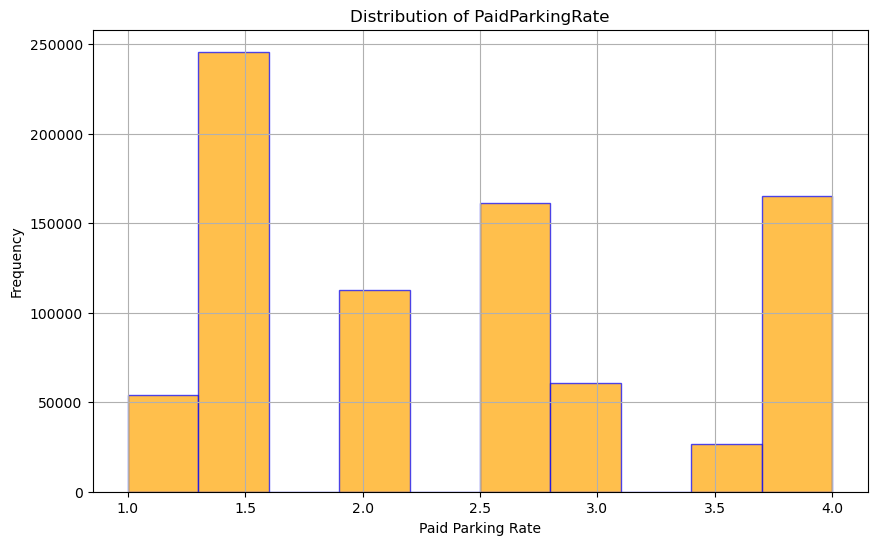

In [11]:
# Plot the distribution of Paid Parking Rate
plt.figure(figsize=(10, 6))
# plt.hist(df['Paid Parking Rate'], bins=10, color='skyblue', edgecolor='black')
plt.hist(df['PaidParkingRate'], bins=10, facecolor='orange', edgecolor='blue', alpha=0.7)
plt.title('Distribution of PaidParkingRate')
plt.xlabel('Paid Parking Rate')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Undersampling

In [12]:
target_counts = df['PaidParkingRate'].value_counts()
print(target_counts)

PaidParkingRate
1.5    245832
4.0    165000
2.5    161151
2.0    112824
3.0     60827
1.0     54212
3.5     26710
Name: count, dtype: int64


Feature Engineering

In [13]:
# Define bin edges and labels
bin_edges = [0, 2, 3, 5]  # Adjust the bin edges as needed
bin_labels = ['Low Surge', 'Moderate Surge', 'High Surge']

# Create a new column 'SurgeLevel' based on the bins
df['SurgeLevel'] = pd.cut(df['PaidParkingRate'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the result
Pretty().gen_table(df.head())


+------------+---------------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+-----------+----------+--------+------+----------+--------------+------------+
| Unnamed: 0 |  OccupancyDateTime  | PaidOccupancy | SideOfStreet | SourceElementKey | ParkingTimeLimitCategory | ParkingSpaceCount | PaidParkingRate | ParkingCategory | Latitude | Longitude | is_us_holiday | temp | feelslike | humidity | precip | snow |  class   |     type     | SurgeLevel |
+------------+---------------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+-----------+----------+--------+------+----------+--------------+------------+
|     0      | 2015-01-15 12:15:00 |       1       |      NE      |      10202       |           240            |     

Unnamed: 0,OccupancyDateTime,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingRate,ParkingCategory,Latitude,Longitude,is_us_holiday,temp,feelslike,humidity,precip,snow,class,type,SurgeLevel
0,2015-01-15 12:15:00,1,NE,10202,240,22,4.0,Paid Parking,47.609,-122.343,False,44.1,44.1,65.93,0.0,0.0,highway,construction,High Surge
1,2015-01-16 17:01:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,man_made,bioswale,High Surge
2,2015-01-15 11:19:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,42.7,38.2,67.42,0.0,0.0,man_made,bioswale,High Surge
3,2015-01-15 11:51:00,9,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,44.1,44.1,65.93,0.0,0.0,place,house,High Surge
4,2015-01-16 16:51:00,3,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,place,house,High Surge


In [14]:
df['OccupancyDateTime'] = pd.to_datetime(df['OccupancyDateTime'])
# Load the dataset and create categorical PaidParkingRate
bins = [i * 0.5 for i in range(9)]
labels = [i for i in range(1, len(bins))]
# data['CategoricalPaidParkingRate'] = pd.cut(data['PaidParkingRate'], bins=bins, labels=labels, include_lowest=True)

# df['Year'] = df['OccupancyDateTime'].dt.year
df['Hour'] = df['OccupancyDateTime'].dt.hour
df['Day'] = df['OccupancyDateTime'].dt.day
df['Weekday'] = df['OccupancyDateTime'].dt.weekday
df['Month'] = df['OccupancyDateTime'].dt.month
# data['OccupancyDateTime'] = pd.to_datetime(data['OccupancyDateTime']).astype(np.int64)
Pretty().gen_table(df.head(10))




+------------+---------------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+-----------+----------+--------+------+----------+--------------+------------+------+-----+---------+-------+
| Unnamed: 0 |  OccupancyDateTime  | PaidOccupancy | SideOfStreet | SourceElementKey | ParkingTimeLimitCategory | ParkingSpaceCount | PaidParkingRate | ParkingCategory | Latitude | Longitude | is_us_holiday | temp | feelslike | humidity | precip | snow |  class   |     type     | SurgeLevel | Hour | Day | Weekday | Month |
+------------+---------------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+-----------+----------+--------+------+----------+--------------+------------+------+-----+---------+-------+
|     0      | 2015-01-15

Unnamed: 0,OccupancyDateTime,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingRate,ParkingCategory,Latitude,Longitude,is_us_holiday,temp,feelslike,humidity,precip,snow,class,type,SurgeLevel,Hour,Day,Weekday,Month
0,2015-01-15 12:15:00,1,NE,10202,240,22,4.0,Paid Parking,47.609,-122.343,False,44.1,44.1,65.93,0.0,0.0,highway,construction,High Surge,12,15,3,1
1,2015-01-16 17:01:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,man_made,bioswale,High Surge,17,16,4,1
2,2015-01-15 11:19:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,42.7,38.2,67.42,0.0,0.0,man_made,bioswale,High Surge,11,15,3,1
3,2015-01-15 11:51:00,9,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,44.1,44.1,65.93,0.0,0.0,place,house,High Surge,11,15,3,1
4,2015-01-16 16:51:00,3,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,place,house,High Surge,16,16,4,1
5,2015-01-15 12:03:00,2,NE,10202,240,22,4.0,Paid Parking,47.609,-122.343,False,44.1,44.1,65.93,0.0,0.0,highway,construction,High Surge,12,15,3,1
6,2015-01-15 14:15:00,6,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,45.8,45.8,68.76,0.0,0.0,man_made,bioswale,High Surge,14,15,3,1
7,2015-01-15 11:11:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,42.7,38.2,67.42,0.0,0.0,man_made,bioswale,High Surge,11,15,3,1
8,2015-01-16 16:34:00,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,50.0,49.2,64.31,0.0,0.0,man_made,bioswale,High Surge,16,16,4,1
9,2015-01-15 12:59:00,0,NW,80193,240,4,4.0,Paid Parking,47.609,-122.343,False,46.0,44.8,65.67,0.0,0.0,building,apartments,High Surge,12,15,3,1


In [15]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Calculate the distance from 
from geopy.distance import great_circle
# Convert 'OccupancyDateTime' to datetime
df['OccupancyDateTime'] = pd.to_datetime(df['OccupancyDateTime'])

# Filter the df for the specified week
week_df = df[(df['OccupancyDateTime'] >= '2015-01-12') & (df['OccupancyDateTime'] <= '2015-01-18')]

# Filter out entries with the maximum 'PaidParkingRate'
downtown_df = week_df[week_df['PaidParkingRate'] == 4]

# Calculate the centroid of downtown
downtown_centroid = (downtown_df['Latitude'].mean(), downtown_df['Longitude'].mean())

# Function to calculate distance from downtown for each row
def calculate_distance_from_downtown(lat, lon, downtown_centroid):
    return great_circle((lat, lon), downtown_centroid).kilometers

# Apply the function to each row
df['DistanceFromDowntown'] = df.apply(
    lambda row: calculate_distance_from_downtown(row['Latitude'], row['Longitude'], downtown_centroid), axis=1
)

# Save the updated dfframe to a new CSV file
df.to_csv('path_to_updated_df.csv', index=False)

# Print out the first few rows to check the new column
df[['SourceElementKey', 'Latitude', 'Longitude', 'PaidParkingRate', 'DistanceFromDowntown']].head(50)

df=df.drop('OccupancyDateTime',axis=1)

In [17]:
from more_itertools import tabulate


def classify_area(class_name):
    if class_name in ['building','leisure', 'craft']:
        return 'residential'
    elif class_name in ['amenity', 'place','tourism','shop' , 'office', 'historic', 'healthcare', 'railway']:
        return 'commercial'
    elif class_name in ['building', 'highway', 'man_made', ]:
        return 'mixed-use'
    else:
        return 'other'

# Apply the function to the 'class' column to create the new 'area_type' column
df['area_type'] = df['class'].apply(classify_area)

# Compute value counts
value_counts = df['area_type'].value_counts()

# Convert to DataFrame for pretty printing
value_counts_df = pd.DataFrame(value_counts).reset_index()

# Rename columns for clarity
value_counts_df.columns = ['area_type', 'count']

# # Print in a pretty table
# print(tabulate(value_counts_df, headers='keys', tablefmt='psql'))

from tabulate import tabulate

# # Assuming your DataFrame is named 'value_counts_df'
# value_counts_df = df['area_type'].value_counts().reset_index()
# value_counts_df.columns = ['area_type', 'count']

# Print in a pretty table
print(tabulate(value_counts_df, tablefmt='psql'))

df_copy=df.copy()
df=df.drop('type',axis=1)

+---+-------------+--------+
| 0 | commercial  | 445947 |
| 1 | residential | 315227 |
| 2 | mixed-use   |  65382 |
+---+-------------+--------+


In [18]:
# Add 'rain' column
df['rain'] = df['precip'] > 0

# Drop rows where 'precip' is NaN
df_no_na = df.dropna()

# Access the 'precip' column from the DataFrame with no NaN values
precip_values = df_no_na['precip']
df_copy1=df.copy()
df=df.drop('precip',axis=1)
df=df.drop('feelslike',axis=1)

In [19]:
Pretty().gen_table(df.head())

+------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+----------+------+----------+------------+------+-----+---------+-------+----------------------+------------+-------+
| Unnamed: 0 | PaidOccupancy | SideOfStreet | SourceElementKey | ParkingTimeLimitCategory | ParkingSpaceCount | PaidParkingRate | ParkingCategory | Latitude | Longitude | is_us_holiday | temp | humidity | snow |  class   | SurgeLevel | Hour | Day | Weekday | Month | DistanceFromDowntown | area_type  |  rain |
+------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+----------+------+----------+------------+------+-----+---------+-------+----------------------+------------+-------+
|     0      |       1       |      NE      |      10202       |   

Unnamed: 0,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingRate,ParkingCategory,Latitude,Longitude,is_us_holiday,temp,humidity,snow,class,SurgeLevel,Hour,Day,Weekday,Month,DistanceFromDowntown,area_type,rain
0,1,NE,10202,240,22,4.0,Paid Parking,47.609,-122.343,False,44.1,65.93,0.0,highway,High Surge,12,15,3,1,0.914,mixed-use,False
1,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,50.0,64.31,0.0,man_made,High Surge,17,16,4,1,0.877,mixed-use,False
2,1,NW,94421,240,7,4.0,Paid Parking,47.608,-122.342,False,42.7,67.42,0.0,man_made,High Surge,11,15,3,1,0.877,mixed-use,False
3,9,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,44.1,65.93,0.0,place,High Surge,11,15,3,1,0.865,commercial,False
4,3,NW,80177,240,8,4.0,Paid Parking,47.608,-122.342,False,50.0,64.31,0.0,place,High Surge,16,16,4,1,0.865,commercial,False


In [20]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category','bool']).columns

# Print the results
print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

# columns_to_drop=['snow','Unnamed: 0']
# df=df.drop(columns_to_drop)

Numerical Features:
Index(['Unnamed: 0', 'PaidOccupancy', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'PaidParkingRate',
       'Latitude', 'Longitude', 'temp', 'humidity', 'snow', 'Hour', 'Day',
       'Weekday', 'Month', 'DistanceFromDowntown'],
      dtype='object')

Categorical Features:
Index(['SideOfStreet', 'ParkingCategory', 'is_us_holiday', 'class',
       'SurgeLevel', 'area_type', 'rain'],
      dtype='object')


Label encoding

In [21]:
from prettytable import PrettyTable

# Define numerical and categorical features
numerical_features = ['PaidOccupancy', 'SourceElementKey',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                       'Latitude', 'Longitude', 'temp', 'humidity',
                       'snow', 'Hour', 'Day', 'Weekday', 'Month', 'PaidParkingRate']

categorical_features = ['SideOfStreet', 'ParkingCategory', 'is_us_holiday', 'class', 
       'SurgeLevel', 'area_type', 'rain']

# Initialize PrettyTable for numerical features
numerical_table = PrettyTable()
numerical_table.field_names = ["Numerical Feature", "Unique Values"]

# Populate the table with unique values for numerical features
for feature in numerical_features:
    unique_values = df[feature].unique()
    numerical_table.add_row([feature, unique_values])

# Print numerical features table
print("Unique Values for Numerical Features:")
print(numerical_table)

# Initialize PrettyTable for categorical features
categorical_table = PrettyTable()
categorical_table.field_names = ["Categorical Feature", "Unique Values"]

# Populate the table with unique values for categorical features
for feature in categorical_features:
    unique_values = df[feature].unique()
    categorical_table.add_row([feature, unique_values])

# Print categorical features table
print("\nUnique Values for Categorical Features:")
print(categorical_table)


Unique Values for Numerical Features:
+--------------------------+--------------------------------------------------------------------------+
|    Numerical Feature     |                              Unique Values                               |
+--------------------------+--------------------------------------------------------------------------+
|      PaidOccupancy       | [ 1  9  3  2  6  0 16 26 11 14 15 17 19  5 10 23  4 27  7  8 12 25 13 20 |
|                          |  18 22 21 24 29 31 28 32 30 33 34 35 36 38 55 48 44 53 47 51 39 43 54 49 |
|                          |                           50 40 37 41 45 52 46]                          |
|     SourceElementKey     |                [10202 94421 80177 ... 21773 12886 57193]                 |
| ParkingTimeLimitCategory |                            [240 600 120  30]                             |
|    ParkingSpaceCount     | [22  7  8  4 31  3 20 29  6  5 24 10  9 21 11 14  2 13 12 25  1 15 19 17 |
|                         

In [22]:
# Initialize LabelEncoder
from sklearn.calibration import LabelEncoder


le = LabelEncoder()
# List of columns to encode
columns_to_encode = ['class', 'SideOfStreet','ParkingCategory','area_type','SurgeLevel','rain']  # replace with your actual column names
# categorical_features = ['SideOfStreet', 'ParkingCategory', 'class', 'type', 'area_type', 'CategoricalPaidParkingRate']

# Perform label encoding
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])



Undersampling

In [23]:
target_counts = df['SurgeLevel'].value_counts()
print(target_counts)

SurgeLevel
1    412868
2    221978
0    191710
Name: count, dtype: int64


Splitting the dataset

Outliers

In [24]:
Pretty().gen_table(df.head(10))

+------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+----------+------+-------+------------+------+-----+---------+-------+----------------------+-----------+------+
| Unnamed: 0 | PaidOccupancy | SideOfStreet | SourceElementKey | ParkingTimeLimitCategory | ParkingSpaceCount | PaidParkingRate | ParkingCategory | Latitude | Longitude | is_us_holiday | temp | humidity | snow | class | SurgeLevel | Hour | Day | Weekday | Month | DistanceFromDowntown | area_type | rain |
+------------+---------------+--------------+------------------+--------------------------+-------------------+-----------------+-----------------+----------+-----------+---------------+------+----------+------+-------+------------+------+-----+---------+-------+----------------------+-----------+------+
|     0      |       1       |      2       |      10202       |           240    

Unnamed: 0,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingRate,ParkingCategory,Latitude,Longitude,is_us_holiday,temp,humidity,snow,class,SurgeLevel,Hour,Day,Weekday,Month,DistanceFromDowntown,area_type,rain
0,1,2,10202,240,22,4.0,1,47.609,-122.343,False,44.1,65.93,0.0,4,0,12,15,3,1,0.914,1,0
1,1,3,94421,240,7,4.0,1,47.608,-122.342,False,50.0,64.31,0.0,7,0,17,16,4,1,0.877,1,0
2,1,3,94421,240,7,4.0,1,47.608,-122.342,False,42.7,67.42,0.0,7,0,11,15,3,1,0.877,1,0
3,9,3,80177,240,8,4.0,1,47.608,-122.342,False,44.1,65.93,0.0,9,0,11,15,3,1,0.865,0,0
4,3,3,80177,240,8,4.0,1,47.608,-122.342,False,50.0,64.31,0.0,9,0,16,16,4,1,0.865,0,0
5,2,2,10202,240,22,4.0,1,47.609,-122.343,False,44.1,65.93,0.0,4,0,12,15,3,1,0.914,1,0
6,6,3,94421,240,7,4.0,1,47.608,-122.342,False,45.8,68.76,0.0,7,0,14,15,3,1,0.877,1,0
7,1,3,94421,240,7,4.0,1,47.608,-122.342,False,42.7,67.42,0.0,7,0,11,15,3,1,0.877,1,0
8,1,3,94421,240,7,4.0,1,47.608,-122.342,False,50.0,64.31,0.0,7,0,16,16,4,1,0.877,1,0
9,0,3,80193,240,4,4.0,1,47.609,-122.343,False,46.0,65.67,0.0,1,0,12,15,3,1,0.966,2,0


In [25]:
# pip install --upgrade numpy pandas
df=df.drop('is_us_holiday',axis=1)

In [26]:
# Print a more detailed summary of the DataFrame including data types
print("Detailed DataFrame Info:")
print(df.info())


Detailed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 826556 entries, 0 to 2750110
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                826556 non-null  int64  
 1   PaidOccupancy             826556 non-null  int64  
 2   SideOfStreet              826556 non-null  int64  
 3   SourceElementKey          826556 non-null  int64  
 4   ParkingTimeLimitCategory  826556 non-null  int64  
 5   ParkingSpaceCount         826556 non-null  int64  
 6   PaidParkingRate           826556 non-null  float64
 7   ParkingCategory           826556 non-null  int64  
 8   Latitude                  826556 non-null  float64
 9   Longitude                 826556 non-null  float64
 10  temp                      826556 non-null  float64
 11  humidity                  826556 non-null  float64
 12  snow                      826556 non-null  float64
 13  class                  

In [27]:
def calculate_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Return the count of outliers (numeric value)
    return np.sum(np.logical_or(column < lower_bound, column > upper_bound))

# Apply the function to calculate outliers
outliers_count = df.apply(calculate_outliers)

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outliers_count)


Number of outliers for each feature:
Unnamed: 0                       0
PaidOccupancy                24290
SideOfStreet                     0
SourceElementKey                 0
ParkingTimeLimitCategory     63566
ParkingSpaceCount            44124
PaidParkingRate                  0
ParkingCategory              64646
Latitude                    101082
Longitude                    21600
temp                         13060
humidity                         0
snow                             0
class                            0
SurgeLevel                       0
Hour                             0
Day                              0
Weekday                          0
Month                            0
DistanceFromDowntown        100566
area_type                        0
rain                        143735
dtype: int64


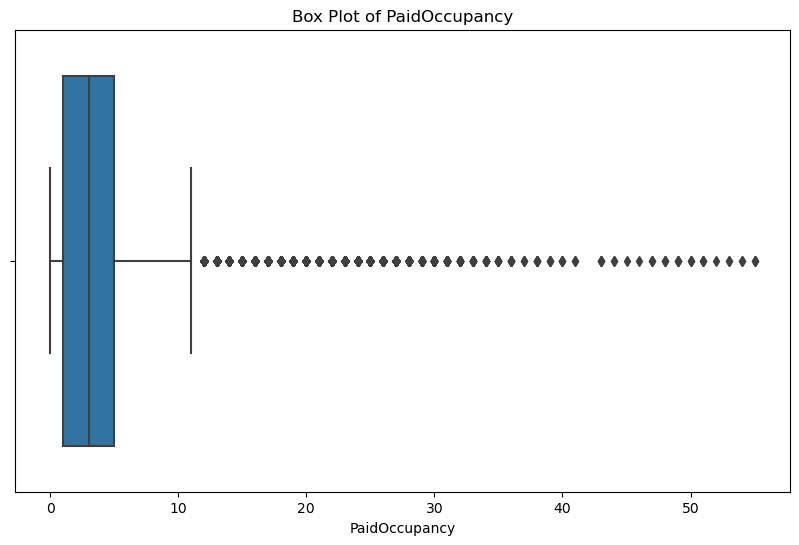

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


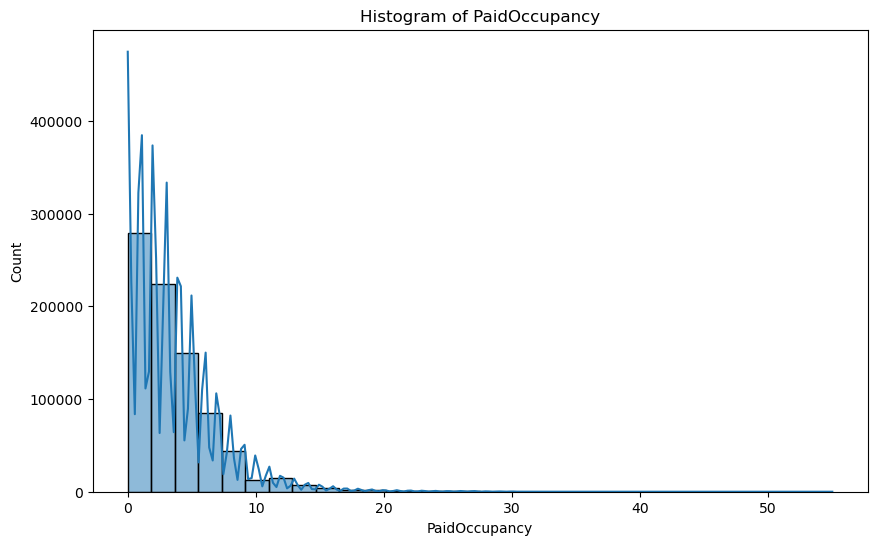

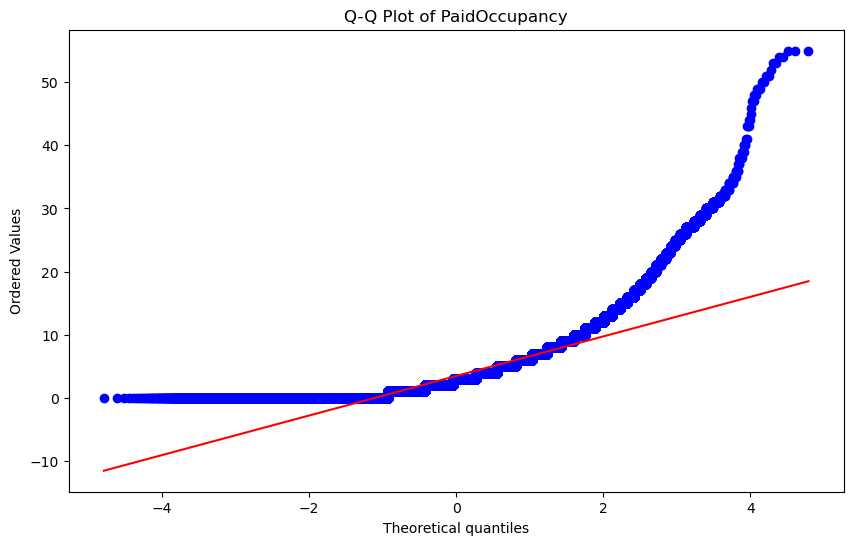

count    826556.000000
mean          3.452398
std           3.441073
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          55.000000
Name: PaidOccupancy, dtype: float64
Number of outliers for PaidOccupancy: 24290




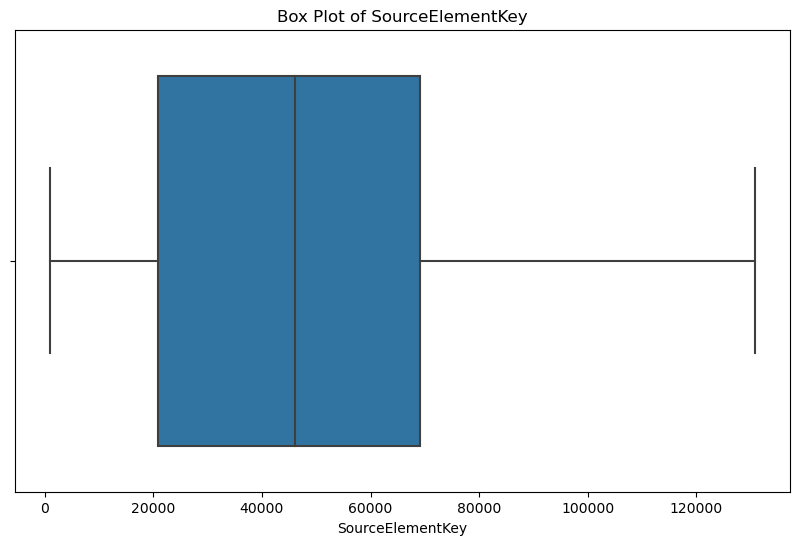

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


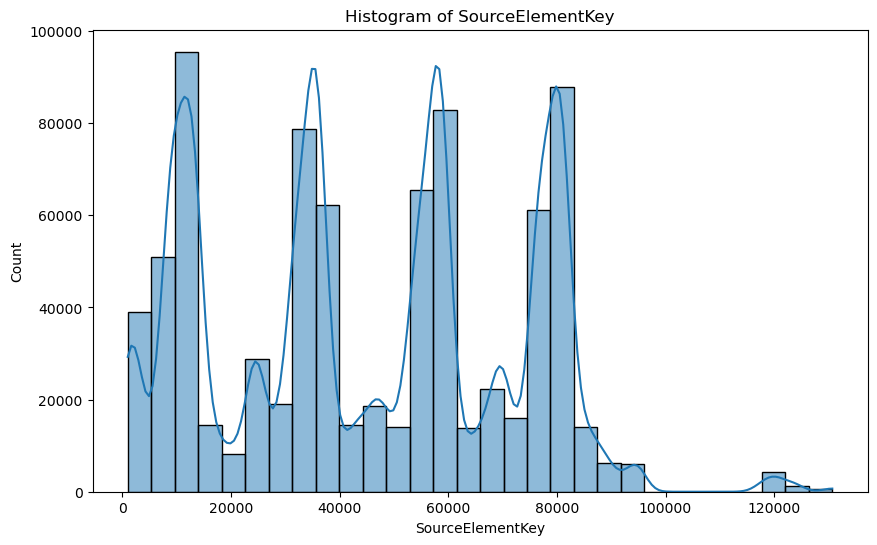

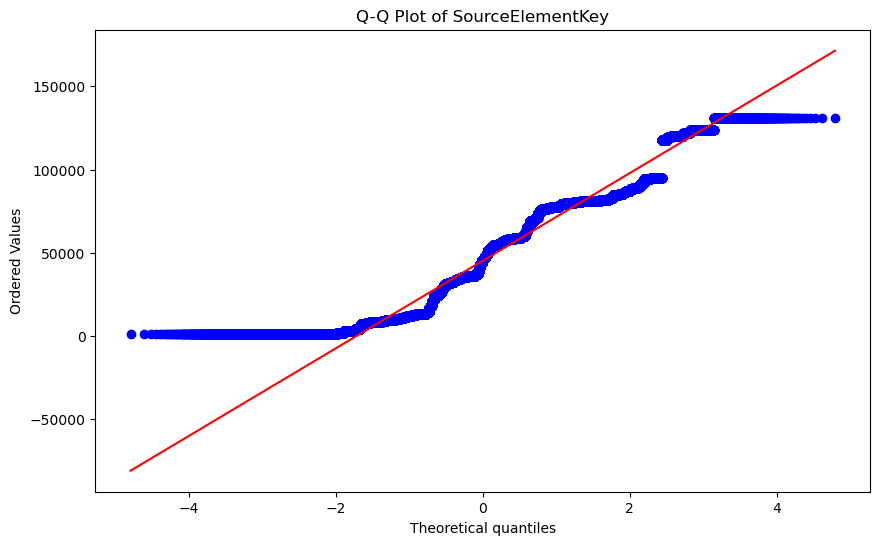

count    826556.000000
mean      45252.545437
std       27050.817198
min        1001.000000
25%       20846.000000
50%       46082.000000
75%       69093.000000
max      130708.000000
Name: SourceElementKey, dtype: float64
Number of outliers for SourceElementKey: 0




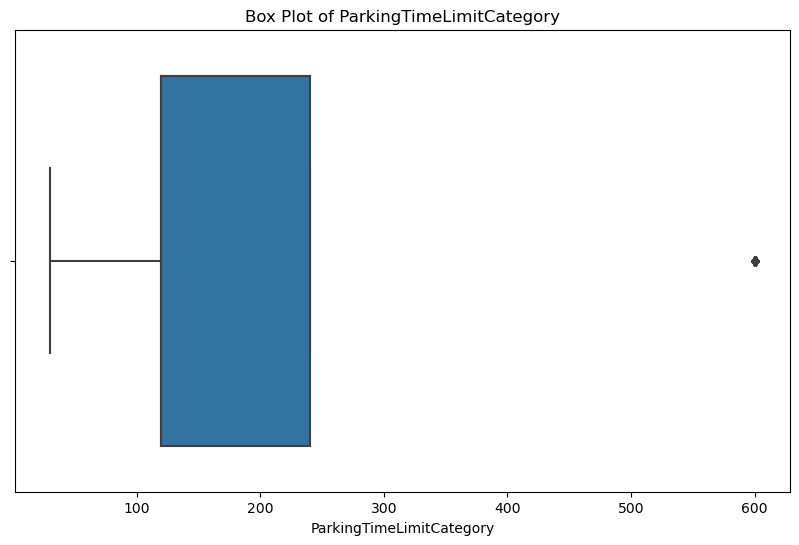

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


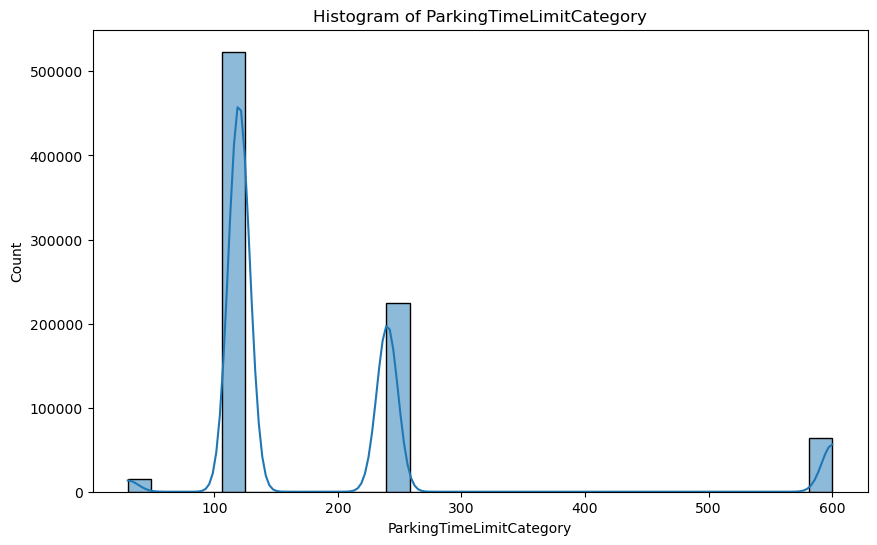

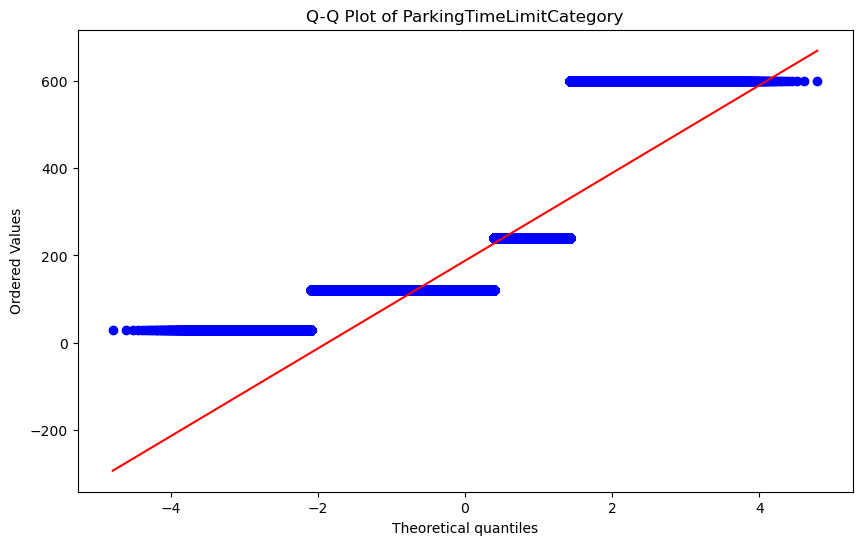

count    826556.000000
mean        187.850829
std         131.050992
min          30.000000
25%         120.000000
50%         120.000000
75%         240.000000
max         600.000000
Name: ParkingTimeLimitCategory, dtype: float64
Number of outliers for ParkingTimeLimitCategory: 63566




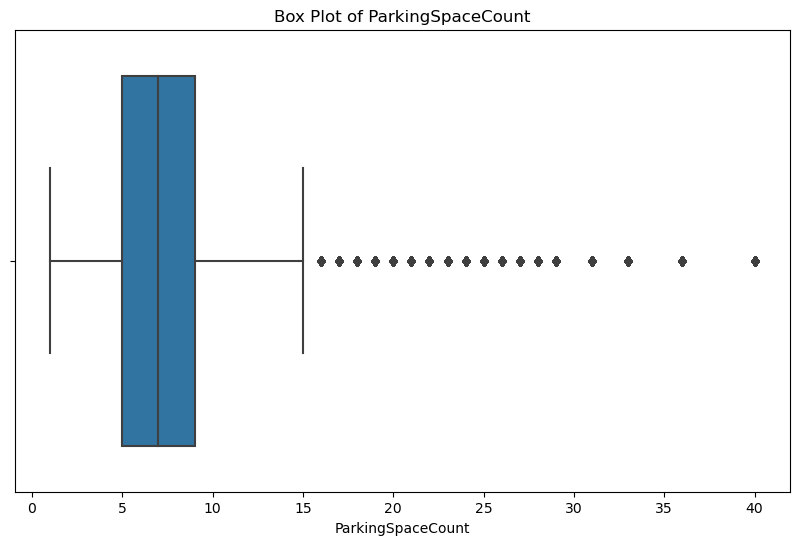

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


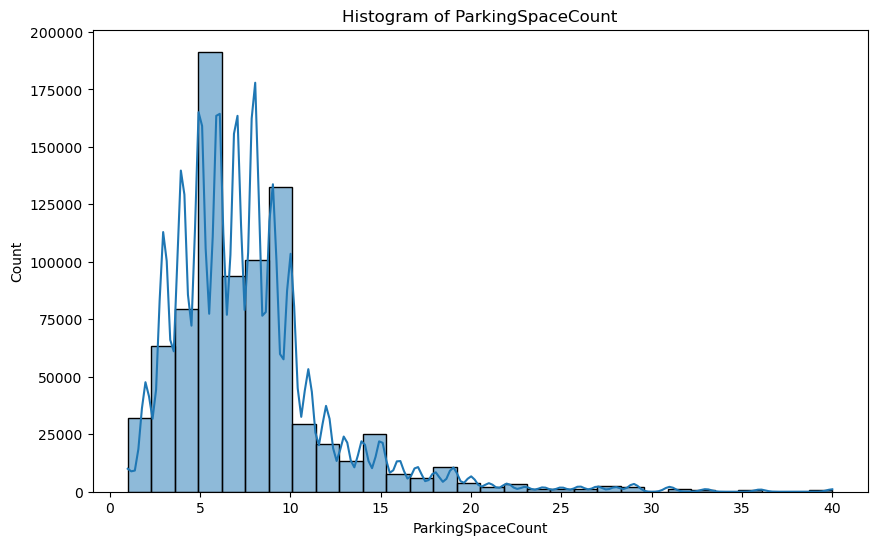

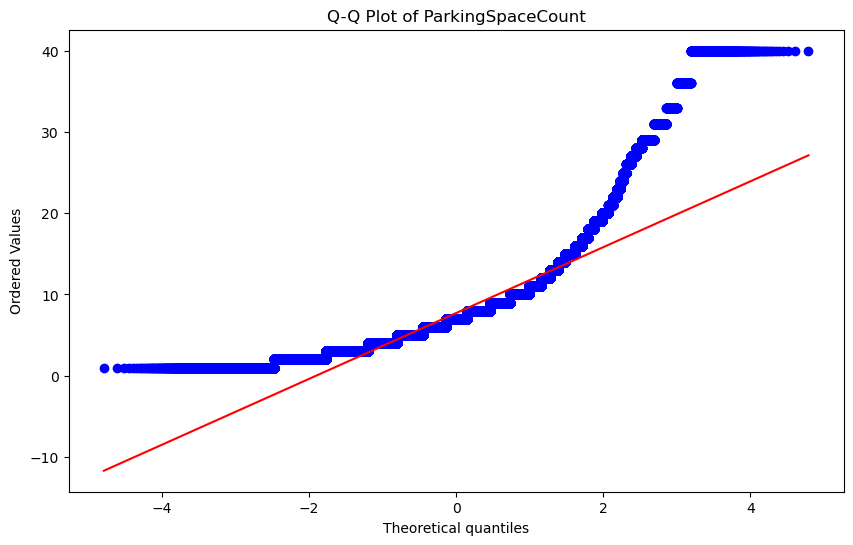

count    826556.000000
mean          7.705762
std           4.421944
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max          40.000000
Name: ParkingSpaceCount, dtype: float64
Number of outliers for ParkingSpaceCount: 44124




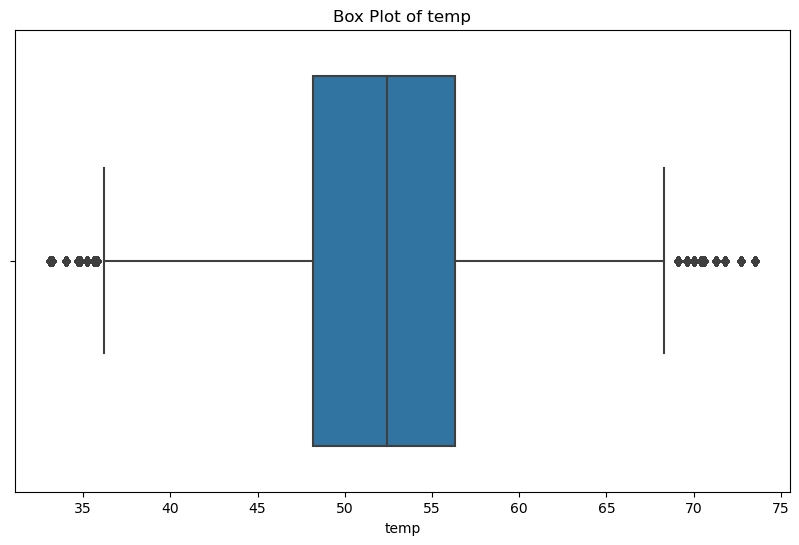

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


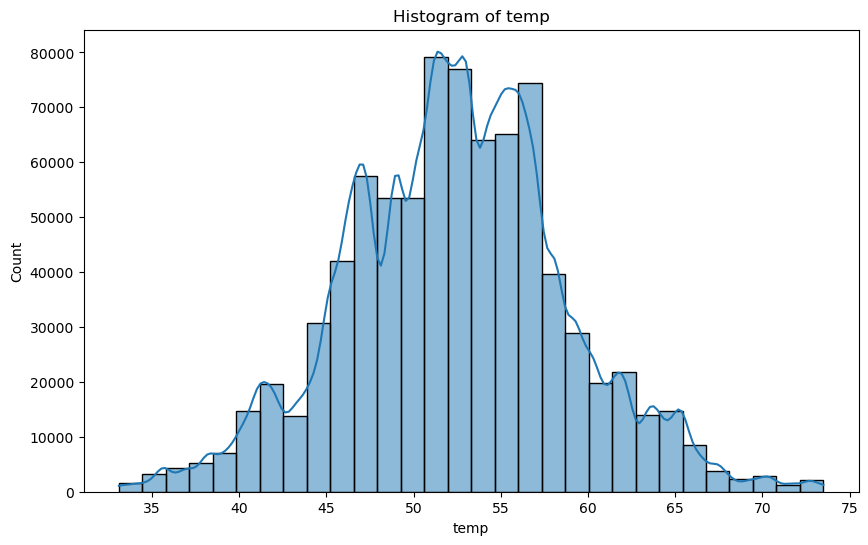

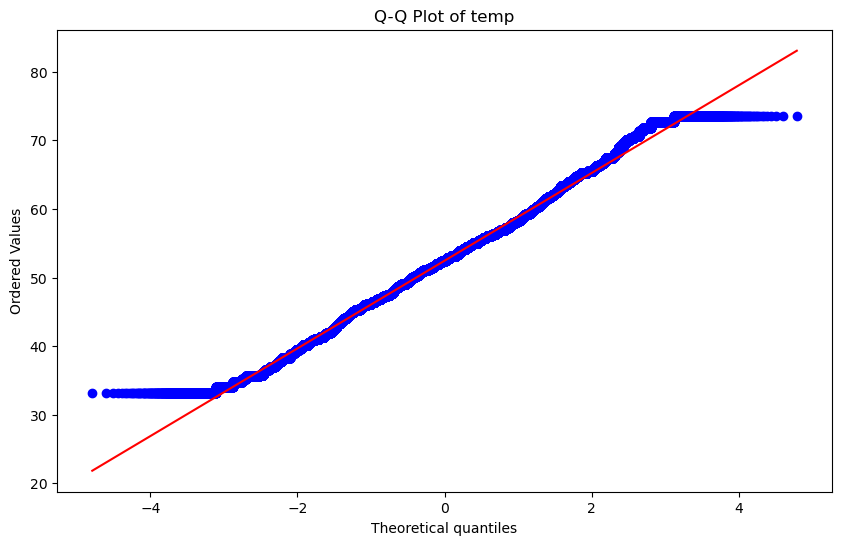

count    826556.000000
mean         52.450847
std           6.404113
min          33.100000
25%          48.200000
50%          52.400000
75%          56.300000
max          73.500000
Name: temp, dtype: float64
Number of outliers for temp: 13060




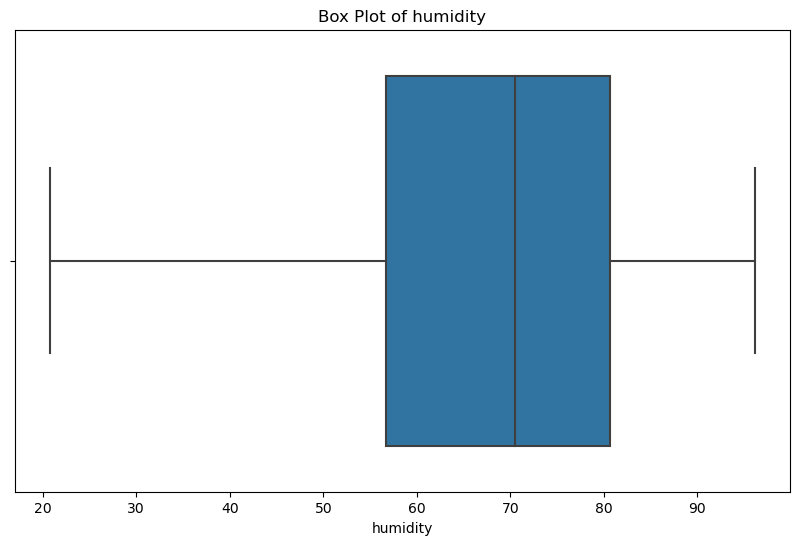

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


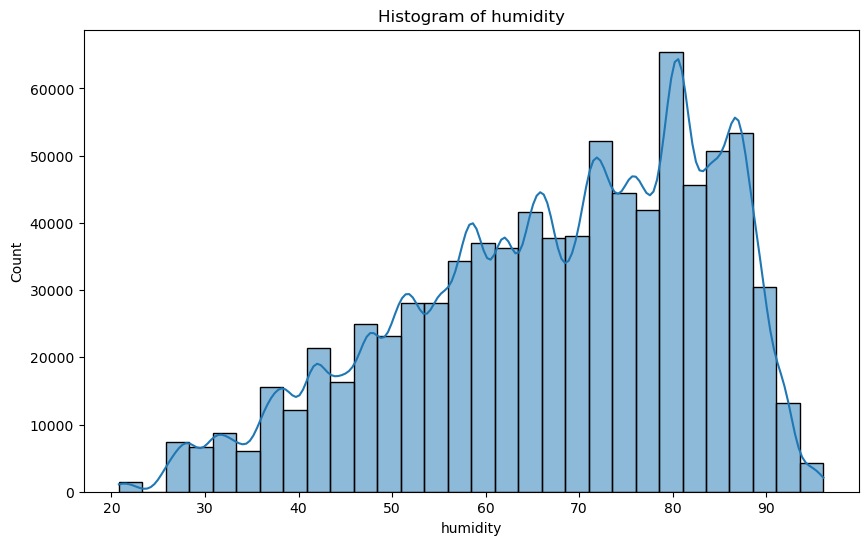

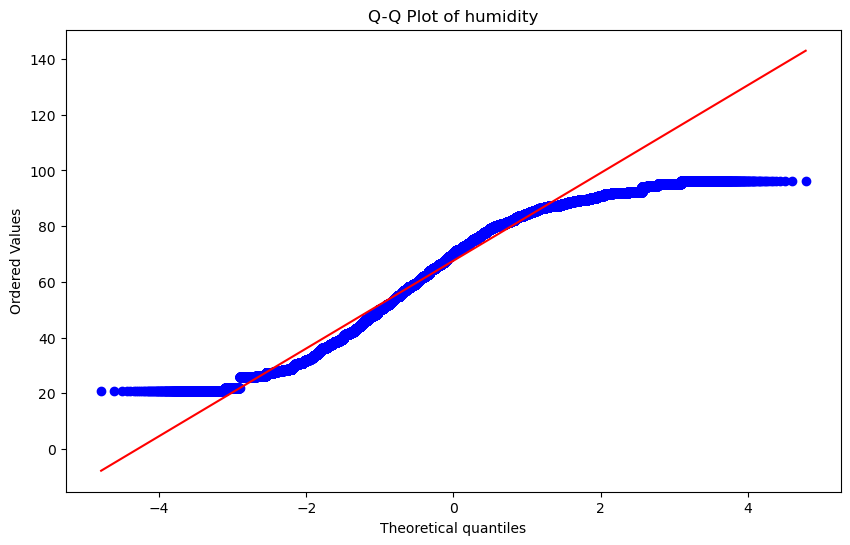

count    826556.000000
mean         67.585868
std          16.080439
min          20.790000
25%          56.670000
50%          70.470000
75%          80.700000
max          96.110000
Name: humidity, dtype: float64
Number of outliers for humidity: 0




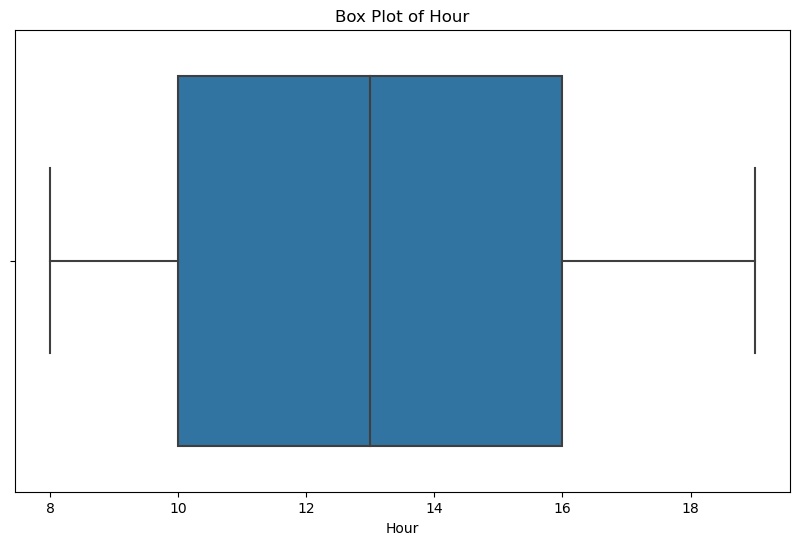

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


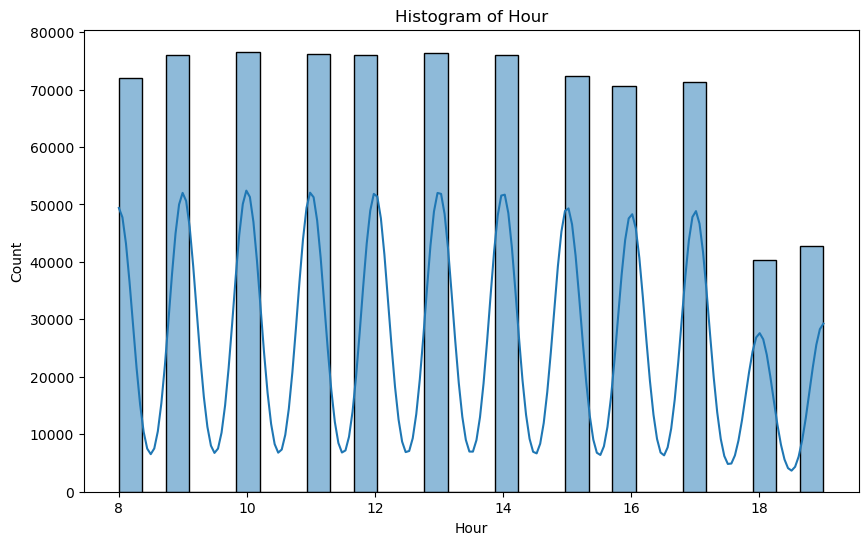

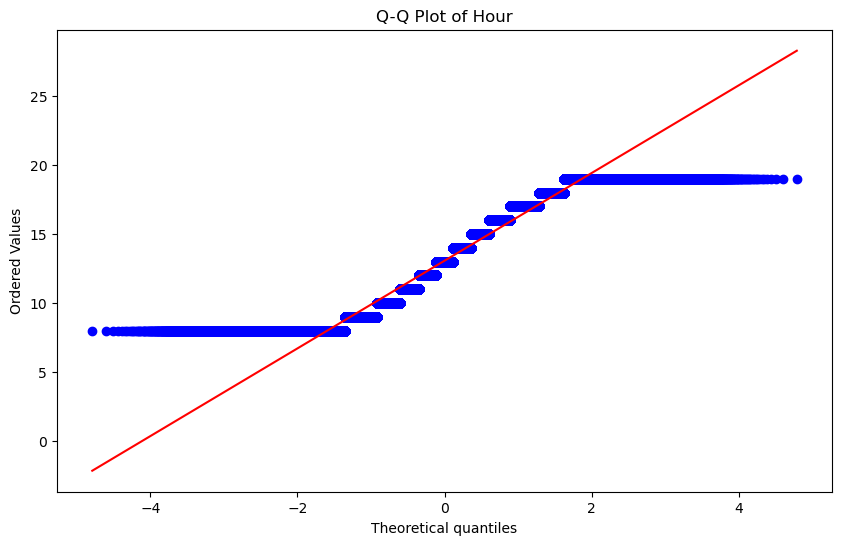

count    826556.000000
mean         13.064709
std           3.257694
min           8.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          19.000000
Name: Hour, dtype: float64
Number of outliers for Hour: 0




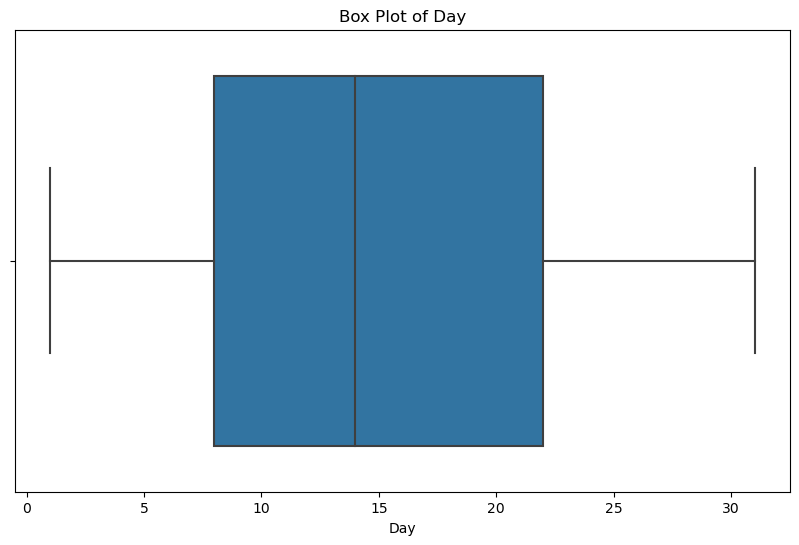

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


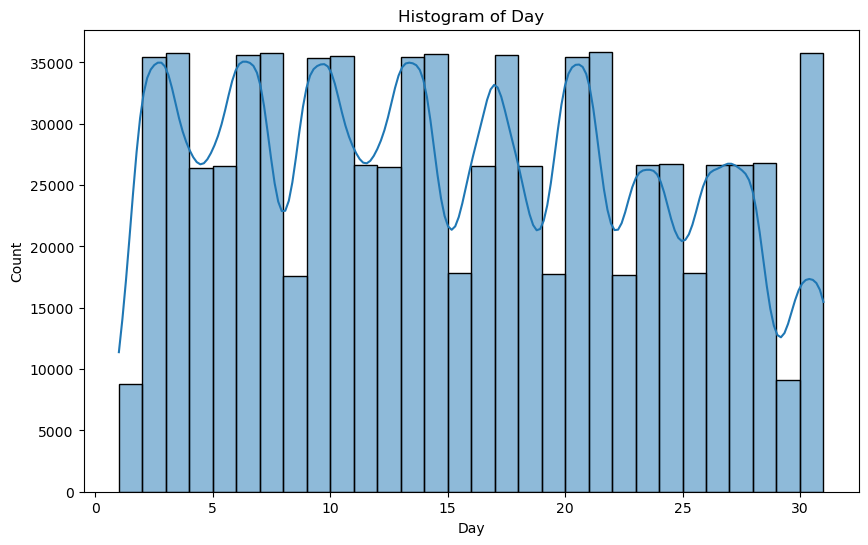

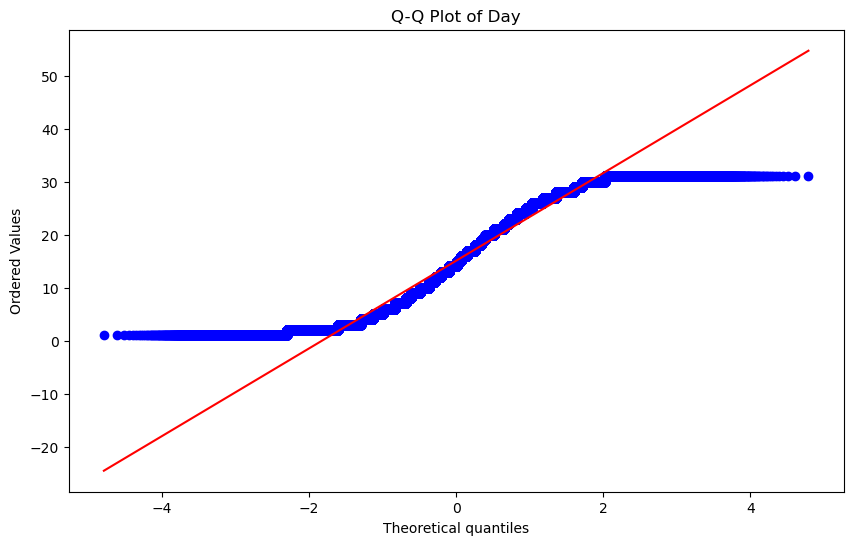

count    826556.000000
mean         15.071189
std           8.457215
min           1.000000
25%           8.000000
50%          14.000000
75%          22.000000
max          31.000000
Name: Day, dtype: float64
Number of outliers for Day: 0




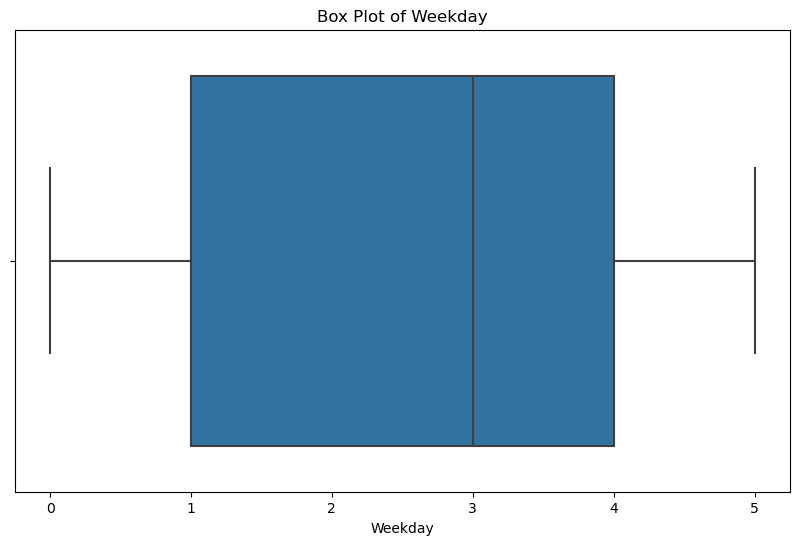

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


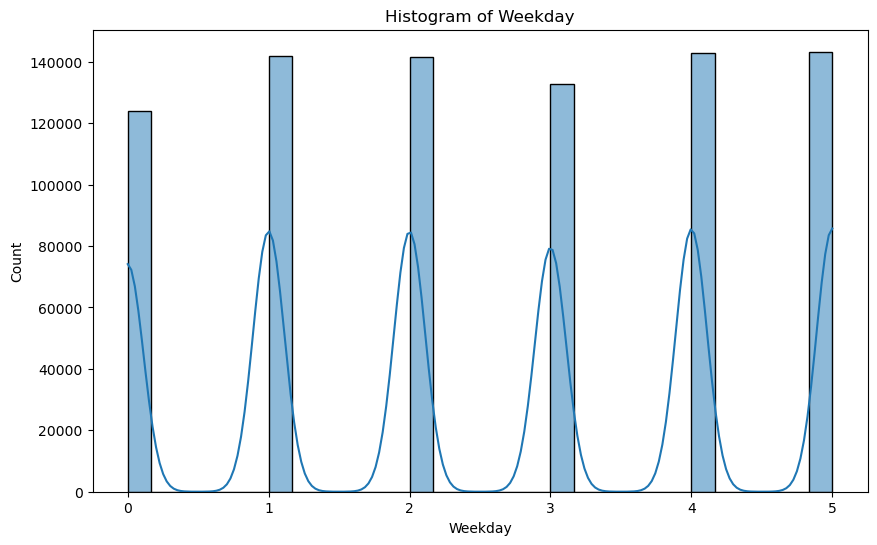

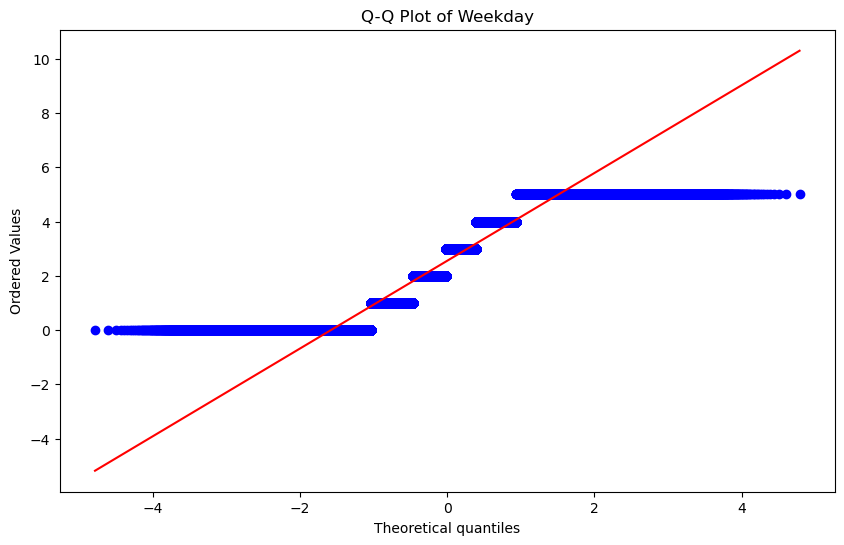

count    826556.000000
mean          2.555177
std           1.695850
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Weekday, dtype: float64
Number of outliers for Weekday: 0




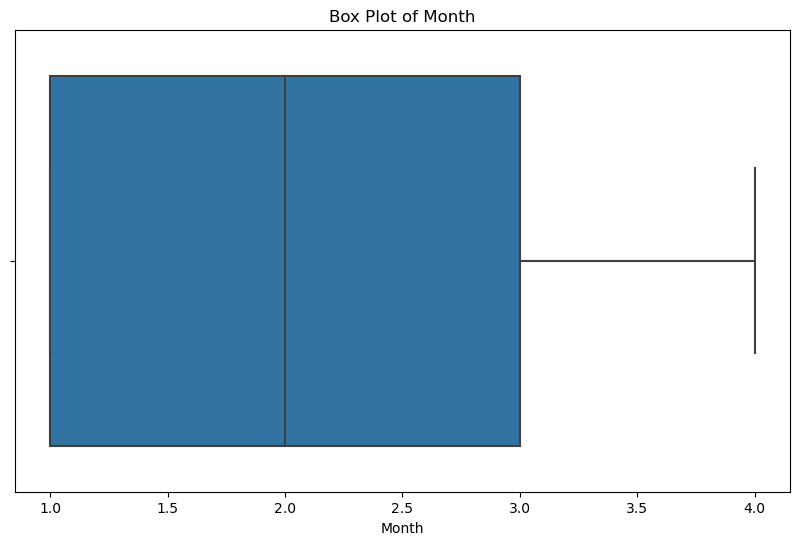

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


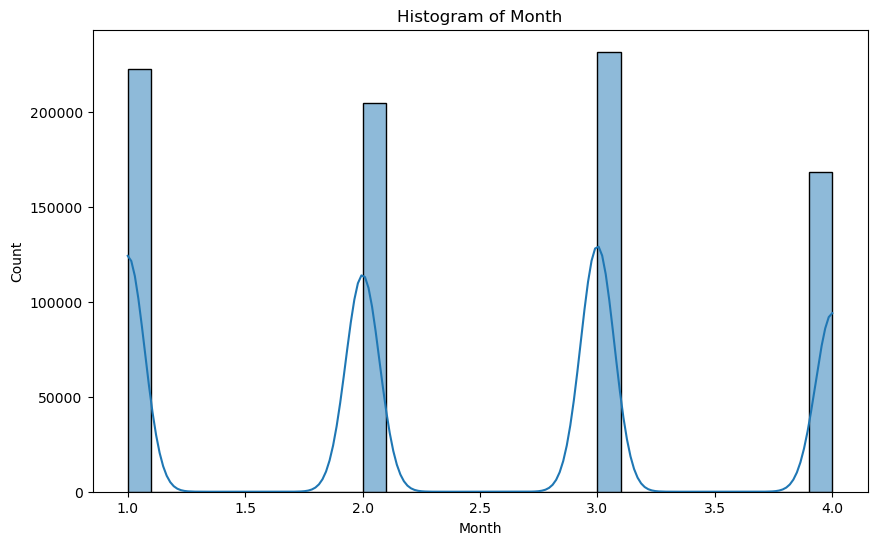

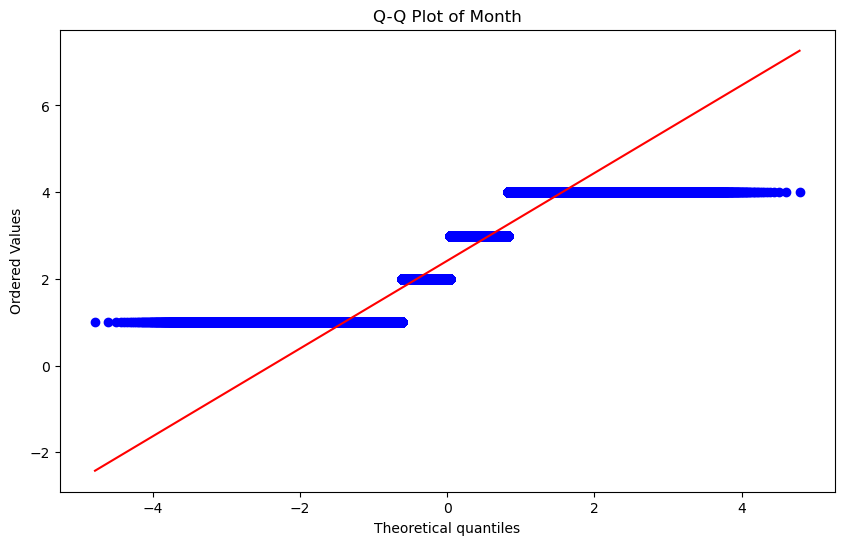

count    826556.000000
mean          2.418433
std           1.090215
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Month, dtype: float64
Number of outliers for Month: 0




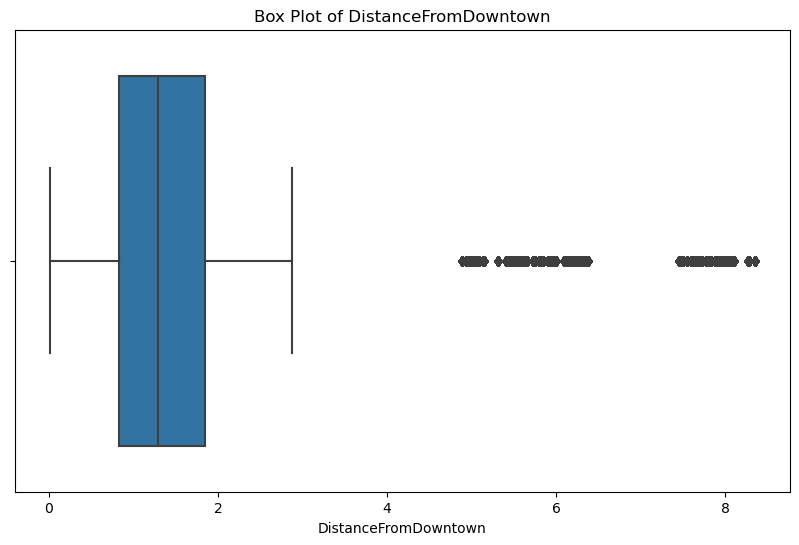

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


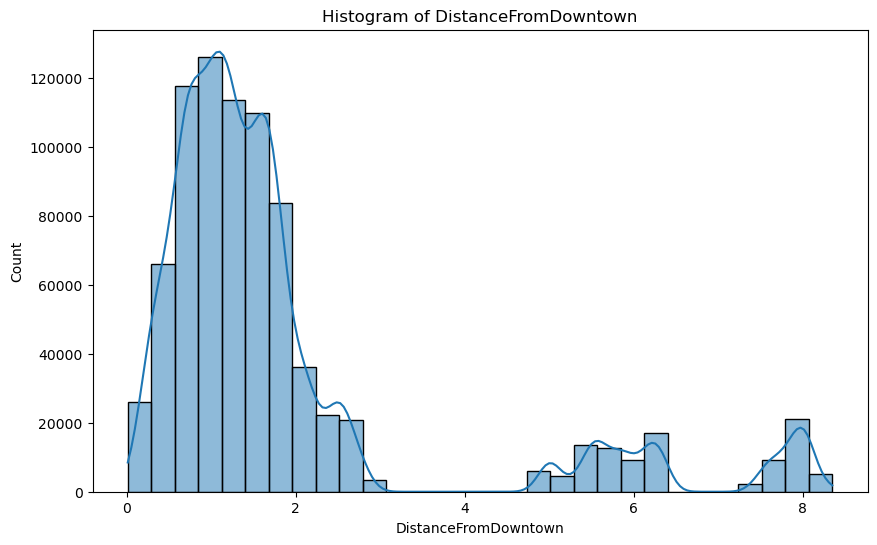

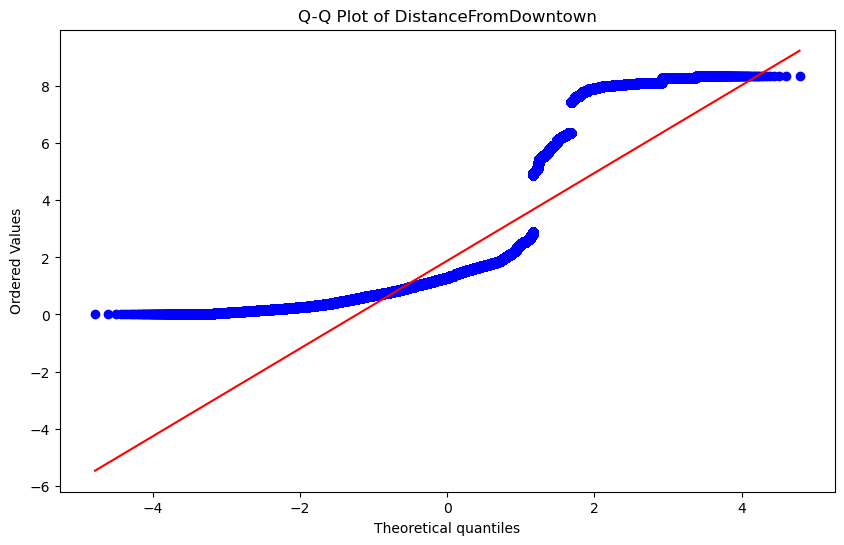

count    826556.000000
mean          1.883589
std           1.860240
min           0.012520
25%           0.833470
50%           1.292572
75%           1.840345
max           8.351211
Name: DistanceFromDowntown, dtype: float64
Number of outliers for DistanceFromDowntown: 100566




In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# # Assuming df is your DataFrame
# numerical_columns = resampled_df.select_dtypes(include=np.number).columns

outlier_numerical_columns = ['PaidOccupancy', 'SourceElementKey',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                      'temp', 'humidity',
                    'Hour', 'Day', 'Weekday', 'Month','DistanceFromDowntown']

for column_name in outlier_numerical_columns:
    # Box plot to visualize outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.show()

    # Histogram to visualize the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.show()

    # Quantile-Quantile (Q-Q) plot to check normality
    plt.figure(figsize=(10, 6))
    stats.probplot(df[column_name], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column_name}')
    plt.show()

    # Descriptive statistics
    desc_stats = df[column_name].describe()
    print(desc_stats)

    # Identify specific outliers based on a threshold
    threshold = 1.5  # You can adjust this threshold
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column_name] < Q1 - threshold * IQR) | (df[column_name] > Q3 + threshold * IQR)]

    # Print the number of outliers and their values
    print(f'Number of outliers for {column_name}: {len(outliers)}')
    # print(f'Outlier values:\n{outliers[column_name]}')
    print('\n' + '='*80 + '\n')


In [29]:
import pandas as pd

def remove_outliers(df, columns, threshold=1.5):
    df_no_outliers = df.copy()
    outliers_dict = {}
    
    for column in columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier threshold
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Identify and remove outliers
        outliers = df_no_outliers[(df_no_outliers[column] < lower_bound) | (df_no_outliers[column] > upper_bound)]
        outliers_dict[column] = outliers
        df_no_outliers = df_no_outliers[~df_no_outliers[column].isin(outliers[column])]
    
    return df_no_outliers, outliers_dict

outlier_numerical_columns = ['PaidOccupancy',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                        'temp', 'humidity',
                    'DistanceFromDowntown']

df_no_outliers, outliers_dict = remove_outliers(df, outlier_numerical_columns)



In [30]:
def calculate_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Return the count of outliers (numeric value)
    return ((column < lower_bound) | (column > upper_bound)).sum().astype(int)

# Apply the function to calculate outliers
outliers_count = df_no_outliers.apply(calculate_outliers)

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outliers_count)


Number of outliers for each feature:
Unnamed: 0                       0
PaidOccupancy                21974
SideOfStreet                     0
SourceElementKey                 0
ParkingTimeLimitCategory         0
ParkingSpaceCount                0
PaidParkingRate                  0
ParkingCategory              60508
Latitude                       508
Longitude                        0
temp                             0
humidity                       584
snow                             0
class                            0
SurgeLevel                       0
Hour                             0
Day                              0
Weekday                          0
Month                            0
DistanceFromDowntown          1339
area_type                        0
rain                        110201
dtype: int64


In [31]:
df_no_outliers['SurgeLevel'].value_counts()

SurgeLevel
1    271217
0    183321
2    168926
Name: count, dtype: int64

In [32]:
# col_to_drop = ['Unnamed: 0', 'is_us_holiday', 'snow']
# df = df.drop(col_to_drop, axis=1)

X = df_no_outliers.drop('SurgeLevel', axis=1)
y = df_no_outliers['SurgeLevel']


# # Check data types of features and target
# print(X.dtypes)
# print(y.dtypes)


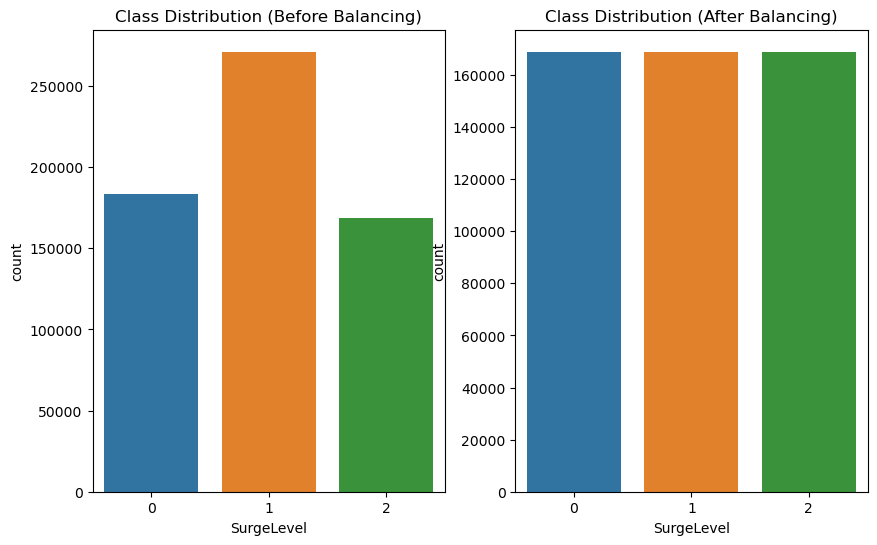

In [33]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your features and target variable
plt.figure(figsize=(10, 6))

# Plot the distribution before balancing
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution (Before Balancing)')

# Apply RandomUnderSampler to balance the target variable
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot the distribution after balancing
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution (After Balancing)')

plt.show()


In [34]:
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [35]:
balanced_df=balanced_df.copy()
reg_df=balanced_df.drop('SurgeLevel',axis=1)
X = reg_df.drop('PaidParkingRate', axis=1)
y = reg_df['PaidParkingRate']


In [36]:
X.head()


,Unnamed: 0,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,ParkingCategory,Latitude,Longitude,temp,humidity,snow,class,Hour,Day,Weekday,Month,DistanceFromDowntown,area_type,rain
604523,5010,1,5,11106,120,9,1,47.602028,-122.333000,49.8,70.40,0.0,0,10,7,1,4,0.693168,0,0
289878,40084,3,5,58490,120,3,1,47.606182,-122.339615,55.9,67.05,0.0,0,16,14,5,2,0.704041,0,0
608316,8803,3,2,68914,120,4,1,47.610085,-122.341050,54.7,65.91,0.0,9,13,7,1,4,0.812011,0,0
790515,41145,0,6,12953,120,10,2,47.612034,-122.324630,58.4,58.24,0.0,9,10,18,5,4,0.631624,0,0
610853,11340,3,6,36097,120,7,1,47.604570,-122.337776,61.2,47.32,0.0,1,13,8,2,4,0.660377,2,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1431)


In [38]:
X_train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'ParkingCategory',
       'Latitude', 'Longitude', 'temp', 'humidity', 'snow', 'class', 'Hour',
       'Day', 'Weekday', 'Month', 'DistanceFromDowntown', 'area_type', 'rain'],
      dtype='object')>

In [39]:

numerical_features = ['PaidOccupancy', 'SourceElementKey',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                       'Latitude', 'Longitude', 'temp', 'humidity', 
                    'Hour', 'Day', 'Weekday', 'Month','DistanceFromDowntown']


# categorical_features = ['SideOfStreet', 'ParkingCategory', 'class', 'type','PaidParkingRate']


In [40]:

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Standardize target variable
y_scaler = StandardScaler()
y_train_std = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_std = y_scaler.transform(y_test.values.reshape(-1, 1))

X_train_std = X_train
X_test_std = X_test


Random forest regressor

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Selected Features with Cumulative Importance <= 0.99:
DistanceFromDowntown: 0.6319228036317338
Latitude: 0.16509963203764333
ParkingTimeLimitCategory: 0.12437088022824025


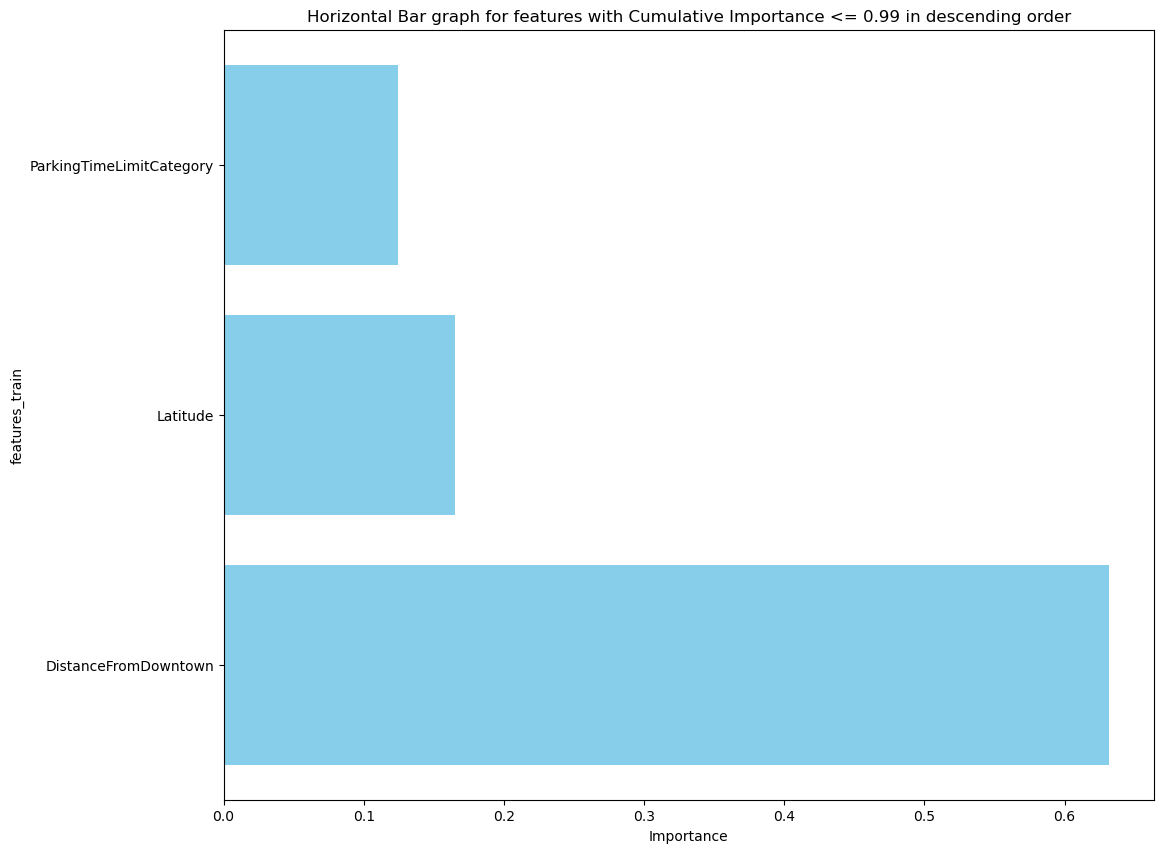

In [41]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train_std and y_train_std_flattened are your input features and target variable

# RFA
model = RandomForestRegressor()
X_train_std = pd.DataFrame(data=X_train_std, columns=X_train_std.columns)
y_train_std_flattened = y_train_std.ravel()
y_train_std_flattened = pd.DataFrame(y_train_std_flattened)
rf_model=model.fit(X_train_std, y_train_std_flattened)

feature_imp = model.feature_importances_
data_dict = {'features_train': X_train_std.columns, 'Importance': feature_imp}
df_data = pd.DataFrame(data_dict)
df_data.sort_values('Importance', ascending=False, inplace=True)

# Set a cumulative threshold for feature importance
cumulative_threshold = 0.99

# Calculate the cumulative sum of feature importances
cumulative_sum = df_data['Importance'].cumsum()

# Select features until the cumulative sum exceeds the threshold
selected_features = df_data[cumulative_sum <= cumulative_threshold]

# Print the selected features and their cumulative importance
print(f"Selected Features with Cumulative Importance <= {cumulative_threshold}:")
for feature, importance in zip(selected_features['features_train'], selected_features['Importance']):
    print(f"{feature}: {importance}")

# Plotting the horizontal bar graph for selected features
plt.figure(figsize=(12, 10))
plt.xlabel('Importance')
plt.ylabel('features_train')
plt.title(f'Horizontal Bar graph for features with Cumulative Importance <= {cumulative_threshold} in descending order')
plt.barh(selected_features['features_train'], selected_features['Importance'], color='skyblue')
plt.show()


/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature Importance in Descending Order:
DistanceFromDowntown: 0.6308976388391586
Latitude: 0.16633675952268454
ParkingTimeLimitCategory: 0.12432630069373087
Longitude: 0.07389343678092743
SourceElementKey: 0.0037319997946138176
ParkingCategory: 0.0007571616613815164
SideOfStreet: 3.984810643837642e-05
ParkingSpaceCount: 1.685460075563004e-05
Unnamed: 0: 1.9351114049096176e-13
humidity: 5.2032119474460515e-14
temp: 4.7627501608040547e-14
Hour: 5.173834869450389e-15
Day: 4.644938997375374e-15
Weekday: 3.3123278233411426e-15
class: 1.2733882149744848e-15
Month: 1.118546784064395e-15
area_type: 4.749250059414336e-16
PaidOccupancy: 1.1877796277104302e-16
snow: 0.0
rain: -1.0560774082051814e-18


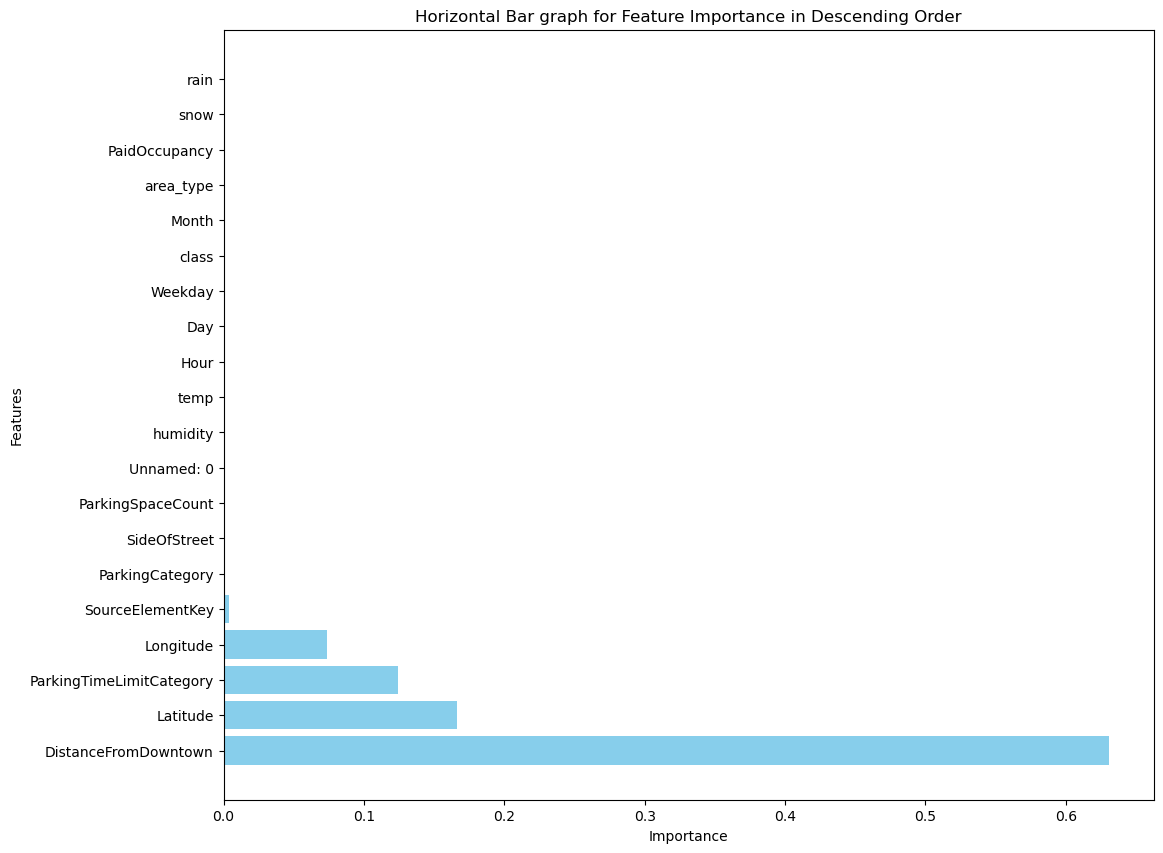

In [42]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train_std and y_train_std_flattened are your input features and target variable

# RFA
model = RandomForestRegressor()
X_train_std = pd.DataFrame(data=X_train_std, columns=X_train_std.columns)
y_train_std_flattened = y_train_std.ravel()
y_train_std_flattened = pd.DataFrame(y_train_std_flattened)
rf_model = model.fit(X_train_std, y_train_std_flattened)

feature_imp = model.feature_importances_
data_dict = {'features_train': X_train_std.columns, 'Importance': feature_imp}
df_data = pd.DataFrame(data_dict)
df_data.sort_values('Importance', ascending=False, inplace=True)

# Print feature importance on the console
print("Feature Importance in Descending Order:")
for feature, importance in zip(df_data['features_train'], df_data['Importance']):
    print(f"{feature}: {importance}")

# Plotting the horizontal bar graph for all features
plt.figure(figsize=(12, 10))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Horizontal Bar graph for Feature Importance in Descending Order')
plt.barh(df_data['features_train'], df_data['Importance'], color='skyblue')
plt.show()


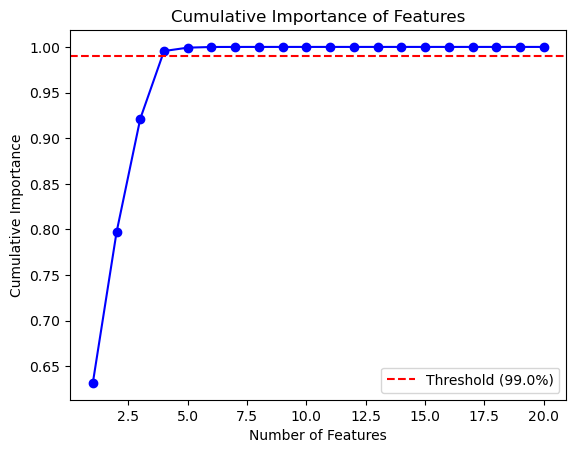

In [43]:
# Plot the cumulative importance
plt.plot(range(1, len(df_data) + 1), cumulative_sum, marker='o', linestyle='-', color='b')
plt.axhline(y=cumulative_threshold, color='r', linestyle='--', label=f'Threshold ({cumulative_threshold * 100}%)')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
# plt.axvline(x=19, color='red', linestyle='--', label='Vertical Line at x=19')
plt.legend()

Principal Component Analysis

In [44]:
print(f'PCA: condition number for reduced data (important features): {np.linalg.cond(X_train_std):.2f}')

PCA: condition number for reduced data (important features): 621892255649198374912.00


In [45]:
len(X_train_std.columns)

20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


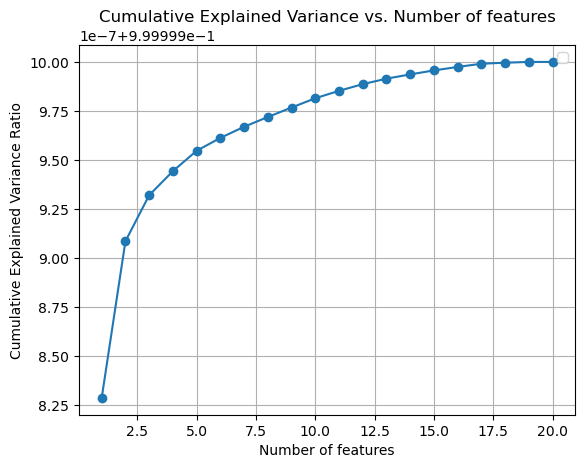


Number of features_train needed to explain more than 95% of the variance: 1
Cumulative explained variance with 1 features_train: 1.000

Explained Variance of Principal Components:
['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


In [46]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_std)
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Number of features')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs. Number of features')
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
num_features_95_percent = np.argmax(explained_variance_ratio_cumsum > 0.95) + 1
# plt.axvline(x=num_features_95_percent, color='y', linestyle='--', label=f'{num_features_95_percent} features_train')
# plt.axhline(y=0.95, color='g', linestyle='--', label='Threshold of 95 percent')
plt.legend()
plt.grid()
plt.show()

print(f"\nNumber of features_train needed to explain more than 95% of the variance: {num_features_95_percent}")
print(f"Cumulative explained variance with {num_features_95_percent} features_train: {explained_variance_ratio_cumsum[num_features_95_percent - 1]:.3f}")
print("\nExplained Variance of Principal Components:")
print([f"{ratio:.3f}" for ratio in pca.explained_variance_ratio_])

In [47]:
# PCA 
from sklearn.decomposition import PCA
# num_features_95_percent = np.argmax(explained_variance_ratio_cumsum > 0.95) + 1
pca = PCA(n_components=3, svd_solver='full')
X_pca = pca.fit_transform(X_train_std)
print(f'PCA: condition number for reduced data (important features): {np.linalg.cond(X_pca):.2f}')


PCA: condition number for reduced data (important features): 6523.96


/var/folders/7b/z3xqcrf14bq6227nd7v85k1r0000gn/T/ipykernel_19150/3312801697.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


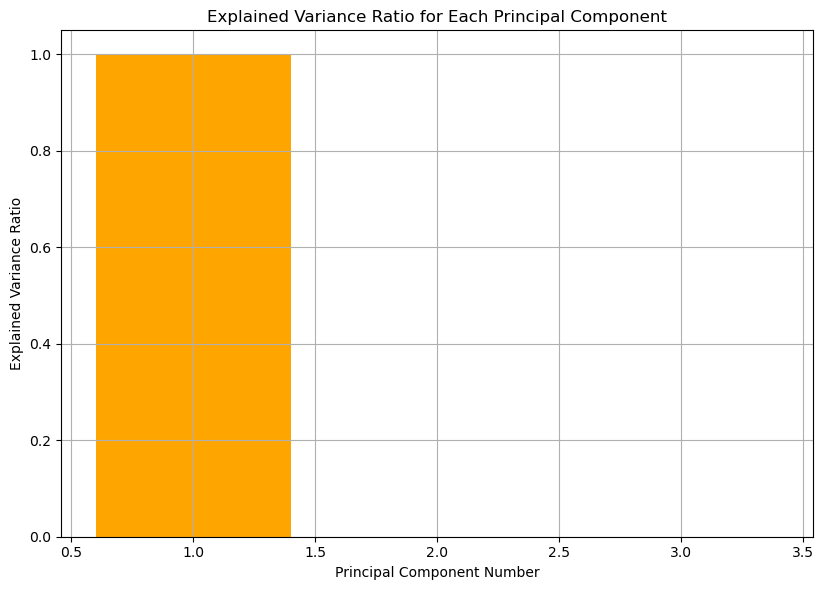

In [48]:
plt.figure(figsize=(16, 6))

# Subplot 2: Explained Variance Ratio of Principal Components
plt.subplot(1, 2, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='orange')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.grid()
plt.title('Explained Variance Ratio for Each Principal Component')

plt.tight_layout()
plt.show()

SVD (Singular Value Decomposition)

In [49]:
from prettytable import PrettyTable

# Singular Value Decomposition Analysis
sin_val = np.linalg.svd(X_train_std, compute_uv=False)

# Print singular values
table_sing = PrettyTable()
table_sing.field_names = ['Singular Value']
table_sing.add_row(['{:.2f}'.format(sin_val[0])])
table_sing.add_row(['{:.2f}'.format(sin_val[1])])
table_sing.title = 'Singular Values'
print(table_sing)



+-----------------+
| Singular Values |
+-----------------+
|  Singular Value |
+-----------------+
|   17595289.76   |
|     2778.57     |
+-----------------+


VIF analysis

In [50]:
# dropto_columns=['salary']
# vif_df=df_encoded.drop(columns=dropto_columns)
vif_df=reg_df
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data1 = pd.DataFrame()
vif_data1['feature'] = vif_df.columns
vif_data1['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in
range(len(vif_df.columns))]
print(vif_data1)

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                     feature           VIF
0                 Unnamed: 0  5.012159e+00
1              PaidOccupancy  3.042438e+00
2               SideOfStreet  3.906435e+00
3           SourceElementKey  3.825694e+00
4   ParkingTimeLimitCategory  1.509718e+01
5          ParkingSpaceCount  8.253213e+00
6            PaidParkingRate  2.674981e+01
7            ParkingCategory  1.526483e+01
8                   Latitude  6.133066e+07
9                  Longitude  6.132461e+07
10                      temp  1.382627e+02
11                  humidity  4.542089e+01
12                      snow           NaN
13                     class  2.008529e+00
14                      Hour  2.249298e+01
15                       Day  4.621363e+00
16                   Weekday  3.338670e+00
17                     Month  1.084517e+01
18      DistanceFromDowntown  1.266561e+01
19                 area_type  2.171888e+00
20                      rain  1.512554e+00


In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(vif_data1)

# columns=PaidParkingRate,ParkingCategory,temp,snow,Hour,Month

                     feature          VIF
0                 Unnamed: 0        5.012
1              PaidOccupancy        3.042
2               SideOfStreet        3.906
3           SourceElementKey        3.826
4   ParkingTimeLimitCategory       15.097
5          ParkingSpaceCount        8.253
6            PaidParkingRate       26.750
7            ParkingCategory       15.265
8                   Latitude 61330663.715
9                  Longitude 61324608.624
10                      temp      138.263
11                  humidity       45.421
12                      snow          NaN
13                     class        2.009
14                      Hour       22.493
15                       Day        4.621
16                   Weekday        3.339
17                     Month       10.845
18      DistanceFromDowntown       12.666
19                 area_type        2.172
20                      rain        1.513


Heatmap

In [52]:

vif_columns=["PaidParkingRate","ParkingCategory","temp","snow","Hour","Month","humidity"]
# dropto_columns=['salary']
# vif_df=df_encoded.drop(columns=dropto_columns)
vif_df = reg_df.drop(vif_columns, axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data1 = pd.DataFrame()
vif_data1['feature'] = vif_df.columns
vif_data1['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in
range(len(vif_df.columns))]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(vif_data1)

# columns=PaidParkingRate,ParkingCategory,temp,snow,Hour,Month

                     feature          VIF
0                 Unnamed: 0        4.485
1              PaidOccupancy        2.702
2               SideOfStreet        3.902
3           SourceElementKey        3.824
4   ParkingTimeLimitCategory       13.168
5          ParkingSpaceCount        8.017
6                   Latitude 57950174.380
7                  Longitude 57943292.242
8                      class        2.004
9                        Day        4.196
10                   Weekday        3.313
11      DistanceFromDowntown        7.857
12                 area_type        2.149
13                      rain        1.222


In [53]:
# reg_df_copy=reg_df.copy()
# ctd=['precipitation','feelslike']
# reg_df=reg_df.drop[ctd]

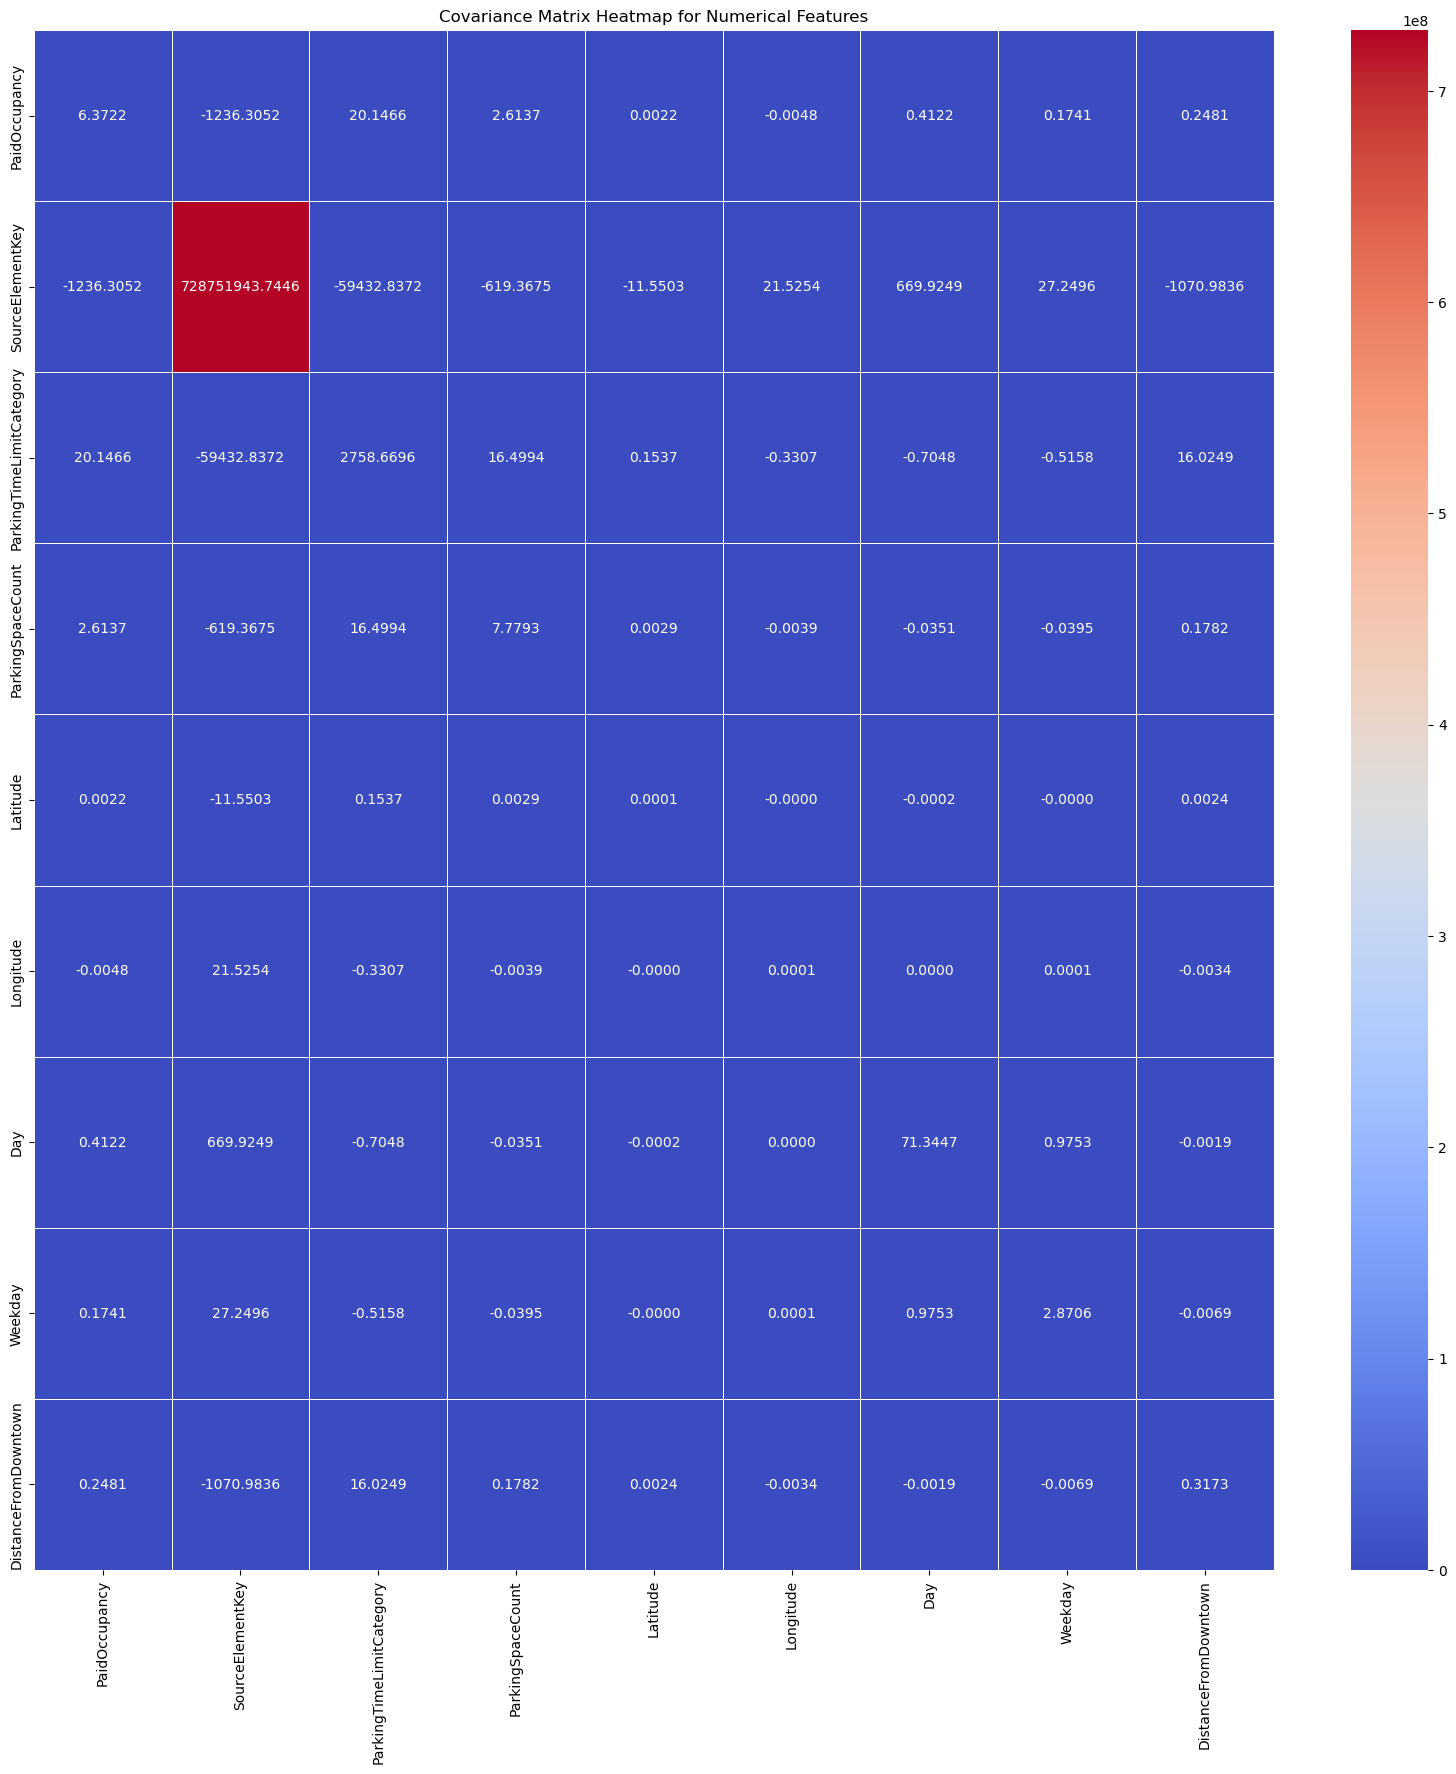

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_features = ['PaidOccupancy', 'SourceElementKey',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                       'Latitude', 'Longitude',
                     'Day', 'Weekday', 'DistanceFromDowntown']


# numerical_features = reg_df.select_dtypes(include='number')
matrix1=vif_df[numerical_features]
covariance_matrix = matrix1.cov()

# Create a heatmap of the covariance matrix
plt.figure(figsize=(20, 20))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap for Numerical Features')
plt.show()


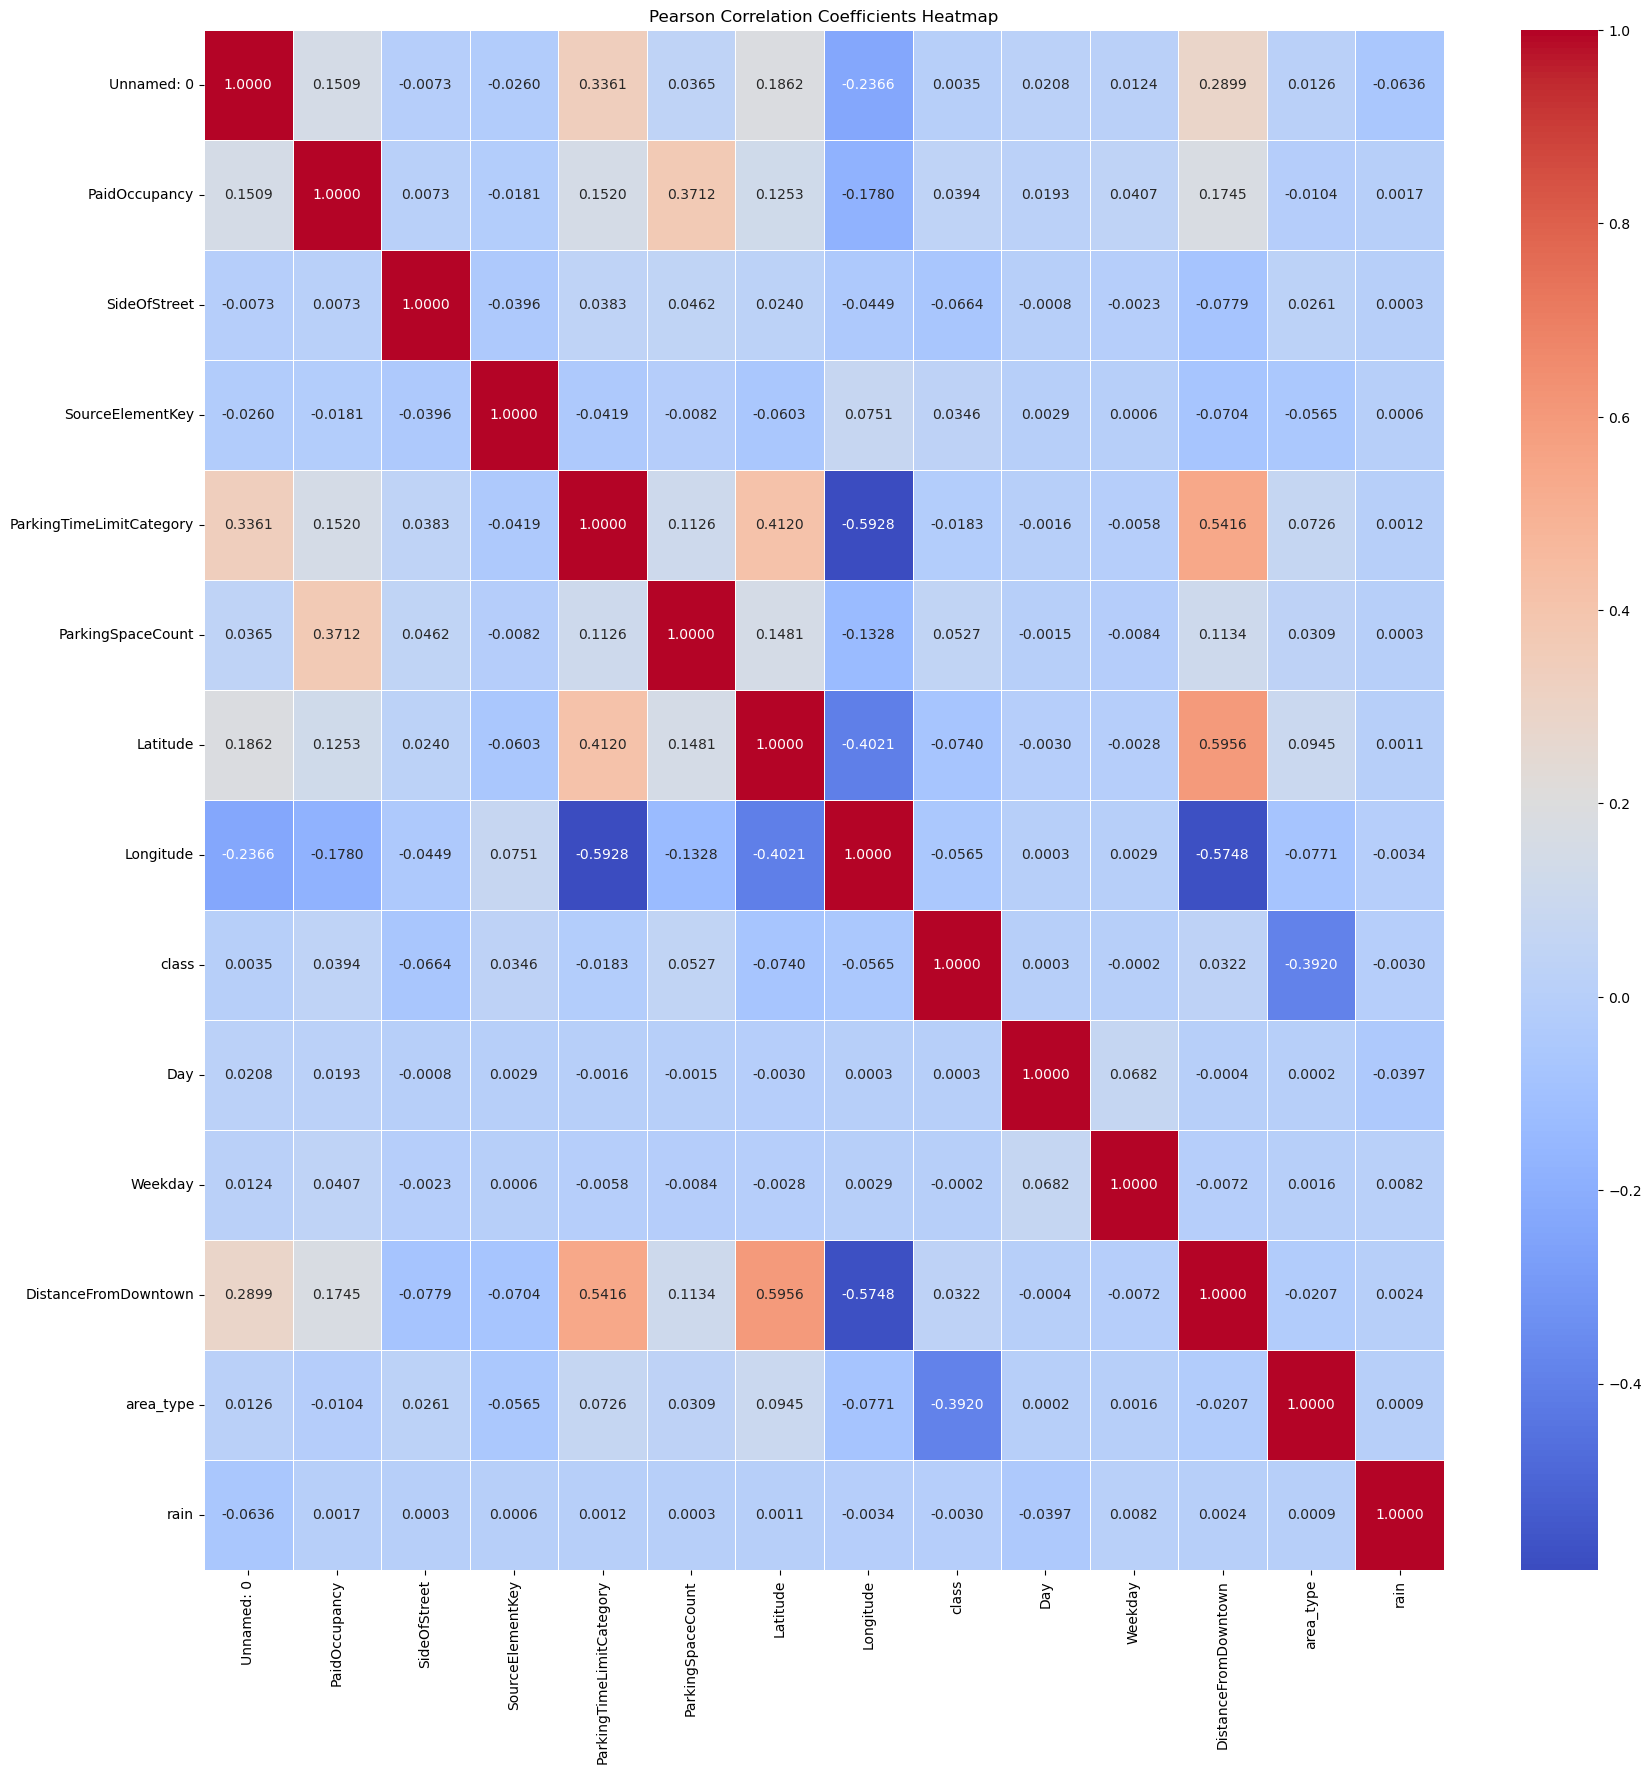

In [55]:
correlation_matrix = vif_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Pearson Correlation Coefficients Heatmap')
plt.show()

In [56]:
df.columns

Index(['Unnamed: 0', 'PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'PaidParkingRate',
       'ParkingCategory', 'Latitude', 'Longitude', 'temp', 'humidity', 'snow',
       'class', 'SurgeLevel', 'Hour', 'Day', 'Weekday', 'Month',
       'DistanceFromDowntown', 'area_type', 'rain'],
      dtype='object')

**`Phase 2 `**

---



In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats

In [130]:
vif_df=vif_df.drop('Unnamed: 0',axis=1)
vif_df.head()

,PaidOccupancy,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,Latitude,Longitude,class,Day,Weekday,DistanceFromDowntown,area_type,rain
604523,1,5,11106,120,9,47.602,-122.333,0,7,1,0.693,0,0
289878,3,5,58490,120,3,47.606,-122.340,0,14,5,0.704,0,0
608316,3,2,68914,120,4,47.610,-122.341,9,7,1,0.812,0,0
790515,0,6,12953,120,10,47.612,-122.325,9,18,5,0.632,0,0
610853,3,6,36097,120,7,47.605,-122.338,1,8,2,0.660,2,0


In [131]:

numerical_features = ['PaidOccupancy', 'SourceElementKey',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                       'Latitude', 'Longitude',
               'Day', 'Weekday', 'DistanceFromDowntown']


# categorical_features = ['SideOfStreet', 'ParkingCategory', 'class', 'type','PaidParkingRate']

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Standardize target variable
y_scaler = StandardScaler()
y_train_std = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_std = y_scaler.transform(y_test.values.reshape(-1, 1))

X_train_std = X_train
X_test_std = X_test


In [132]:
print("\n2 Printing OLS summary \n)")
model_initial = sm.OLS(y_train_std, X_train_std).fit()
X_train_std_copy = X_train_std.copy()

# Initial model_initial Summary
print("Initial model_initial Summary:")
print(model_initial.summary())


2 Printing OLS summary 
)


Initial model_initial Summary:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                          4.377e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        19:46:05   Log-Likelihood:                     -3.4911e+05
No. Observations:              405422   AIC:                                  6.983e+05
Df Residuals:                  405403   BIC:                                  6.985e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.9

Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train_std)

# Use the same features for prediction
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)


X_train_selected=sm.add_constant(X_train_std)
ols_model=sm.OLS(y_train_std,X_train_selected).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 4.383e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:46:07   Log-Likelihood:            -3.4895e+05
No. Observations:              405422   AIC:                         6.979e+05
Df Residuals:                  405402   BIC:                         6.982e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [134]:
# Assuming X_train_selected and y_train_std are your input features and target variable
X_train_selected = sm.add_constant(X_train_std)
ols_model = sm.OLS(y_train_std, X_train_selected).fit()

# Obtain AIC, BIC, and MSE values
aic_value = ols_model.aic
bic_value = ols_model.bic
mse_value = ((ols_model.resid) ** 2).mean()
# Obtain R-squared value
r_squared_value = ols_model.rsquared

# Print the values
print(f'AIC: {aic_value}')
print(f'BIC: {bic_value}')
print(f'R-squared: {r_squared_value}')
print(f'MSE: {mse_value}')
confidence_intervals = ols_model.conf_int()

# Print confidence intervals
print("Confidence Intervals:")
print(confidence_intervals)

AIC: 697940.9880758307
BIC: 698159.2417514091
R-squared: 0.6725626126641138
MSE: 0.3274373873358866
Confidence Intervals:
                              0      1
const                    -0.088 -0.071
Unnamed: 0               -0.000 -0.000
PaidOccupancy            -0.072 -0.068
SideOfStreet              0.002  0.004
SourceElementKey          0.011  0.014
ParkingTimeLimitCategory -0.296 -0.291
ParkingSpaceCount         0.011  0.015
ParkingCategory           0.201  0.213
Latitude                 -0.041 -0.037
Longitude                -0.118 -0.114
temp                      0.019  0.023
humidity                 -0.011 -0.005
snow                      0.000  0.000
class                    -0.004 -0.003
Hour                      0.021  0.025
Day                      -0.002  0.002
Weekday                   0.003  0.006
Month                    -0.014 -0.010
DistanceFromDowntown     -0.616 -0.611
area_type                -0.015 -0.011
rain                     -0.011 -0.001


In [135]:

# # # T test Analysis
t_test_results = model_initial.summary().tables[1]
print("T Test Results:")
print(t_test_results)

# # # F-test analysis
f_test_results = model_initial.f_pvalue
print("F Test Results:")
print(f_test_results)

T Test Results:
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Unnamed: 0               -6.152e-06   6.58e-08    -93.569      0.000   -6.28e-06   -6.02e-06
PaidOccupancy               -0.0729      0.001    -70.882      0.000      -0.075      -0.071
SideOfStreet                 0.0006      0.000      1.443      0.149      -0.000       0.001
SourceElementKey             0.0119      0.001     13.122      0.000       0.010       0.014
ParkingTimeLimitCategory    -0.2909      0.001   -240.992      0.000      -0.293      -0.289
ParkingSpaceCount            0.0155      0.001     15.773      0.000       0.014       0.017
ParkingCategory              0.1643      0.002     77.346      0.000       0.160       0.169
Latitude                    -0.0368      0.001    -31.947      0.000      -0.039      -0.035
Longitude                   -0.1132      0.001    -90.

In [136]:
# X_train_std.drop(['rain'],axis=1,inplace=True)
# model_initial = sm.OLS(y_train_std,X_train_std).fit()
# print(model_initial.summary())# Need to check if we can remove any values

Polynomial Regression

In [137]:
print(X_train_std.columns)

Index(['Unnamed: 0', 'PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'ParkingCategory',
       'Latitude', 'Longitude', 'temp', 'humidity', 'snow', 'class', 'Hour',
       'Day', 'Weekday', 'Month', 'DistanceFromDowntown', 'area_type', 'rain'],
      dtype='object')


In [138]:
print(y_train_std.shape)

(405422, 1)


In [139]:
print(X_test_std.columns)

Index(['Unnamed: 0', 'PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'ParkingCategory',
       'Latitude', 'Longitude', 'temp', 'humidity', 'snow', 'class', 'Hour',
       'Day', 'Weekday', 'Month', 'DistanceFromDowntown', 'area_type', 'rain'],
      dtype='object')


In [140]:
print(y_test_std.shape)

(101356, 1)


In [77]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(X_train_std)
model = sm.OLS(y_train_std, xp)
reg_poly = model.fit()

print(reg_poly.summary())

xt = polynomial_features.fit_transform(X_test_std)
y_pred2 = reg_poly.predict(xt)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming y_test_std contains the true labels for your test data
mse = mean_squared_error(y_test_std, y_pred2)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.29046579222946123


**Phase 3**

---





In [57]:
vif_df.columns

Index(['Unnamed: 0', 'PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'Latitude',
       'Longitude', 'class', 'Day', 'Weekday', 'DistanceFromDowntown',
       'area_type', 'rain'],
      dtype='object')

In [58]:
balanced_df.columns

Index(['Unnamed: 0', 'PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
       'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'PaidParkingRate',
       'ParkingCategory', 'Latitude', 'Longitude', 'temp', 'humidity', 'snow',
       'class', 'Hour', 'Day', 'Weekday', 'Month', 'DistanceFromDowntown',
       'area_type', 'rain', 'SurgeLevel'],
      dtype='object')

In [59]:
drop_columns=['Unnamed: 0','PaidParkingRate','ParkingCategory','temp','humidity','snow','Hour','Month']
class_df=balanced_df.drop(drop_columns,axis=1)

In [60]:
classification_df=class_df

In [61]:
# Separate features (X) and target variable (y)
X = classification_df.drop(columns=['SurgeLevel'])
y = classification_df['SurgeLevel']

Standardization

In [62]:
print(y.value_counts())


SurgeLevel
0    168926
1    168926
2    168926
Name: count, dtype: int64


In [63]:

numerical_features = ['PaidOccupancy', 'SourceElementKey',
                       'ParkingTimeLimitCategory', 'ParkingSpaceCount',
                       'Latitude', 'Longitude', 
                    'Day', 'Weekday' ,'DistanceFromDowntown']

# ['PaidOccupancy', 'SideOfStreet', 'SourceElementKey',
#        'ParkingTimeLimitCategory', 'ParkingSpaceCount', 'Latitude',
#        'Longitude', 'class', 'Day', 'Weekday', 'DistanceFromDowntown',
#        'area_type', 'rain'],

# categorical_features = ['SideOfStreet', 'ParkingCategory', 'class', 'type','PaidParkingRate']



In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1431)
x_scaler = StandardScaler()
X_train[numerical_features] = x_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = x_scaler.transform(X_test[numerical_features])
X_train_std = X_train
X_test_std = X_test

# Target standardization
y_train_std = y_train
y_test_std = y_test

Selected important cloumns from RFA & VIF

In [65]:

opt_X_train=X_train_std
opt_X_test=X_test_std

Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=5805)
path = model.cost_complexity_pruning_path(opt_X_train,y_train_std)
alphas = path['ccp_alphas']
print(len(alphas))

32


Trial -2 prepruning

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Test accuracy: 1.0


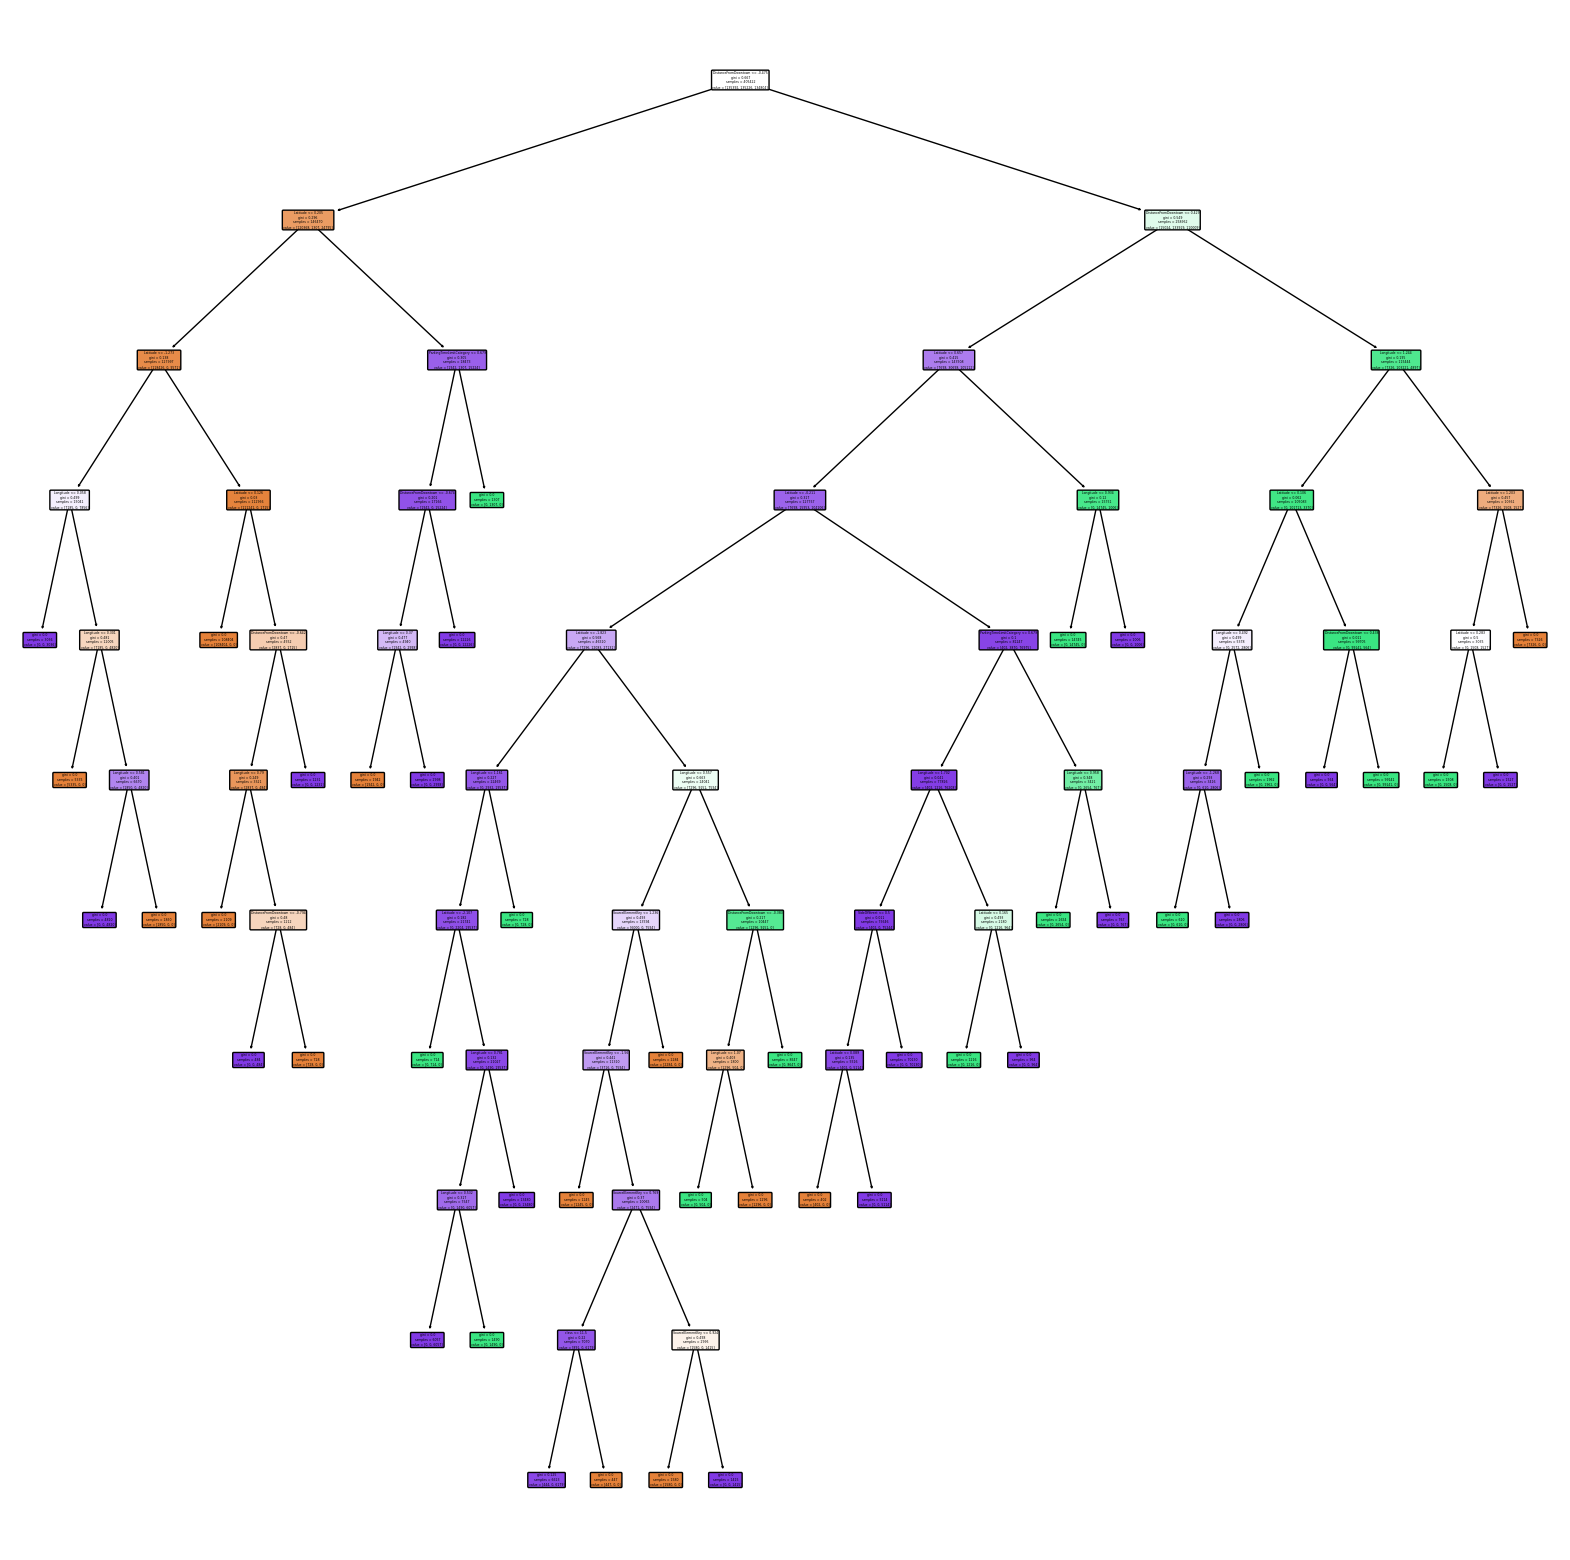

Confusion Matrix:
[[33431     0   103]
 [    0 33700     0]
 [    0     0 34122]]


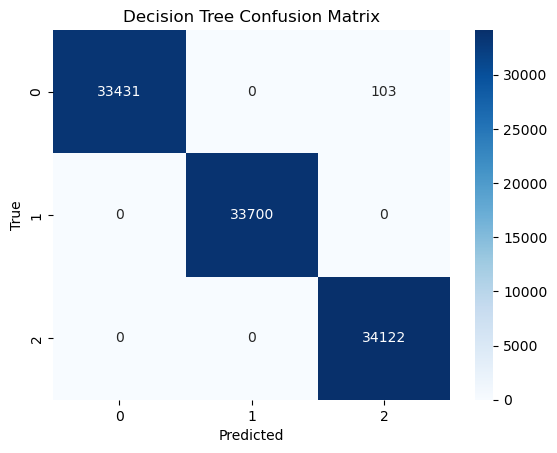


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33534
           1       1.00      1.00      1.00     33700
           2       1.00      1.00      1.00     34122

    accuracy                           1.00    101356
   macro avg       1.00      1.00      1.00    101356
weighted avg       1.00      1.00      1.00    101356

Confusion Matrix:
[[33431     0   103]
 [    0 33700     0]
 [    0     0 34122]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33534
           1       1.00      1.00      1.00     33700
           2       1.00      1.00      1.00     34122

    accuracy                           1.00    101356
   macro avg       1.00      1.00      1.00    101356
weighted avg       1.00      1.00      1.00    101356


Confusion Matrix:
[[33431     0   103]
 [    0 33700     0]
 [    0     0 34122]]

Individual Metrics:
Prec

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score


tuned_parameters = [{'max_depth': [5, 10],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4],
                     'max_features': [1, 20],
                     'splitter': ['best', 'random'],
                     'criterion': ['gini', 'entropy', 'log_loss']}]
dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, tuned_parameters, cv=5, scoring='accuracy')
grid_search.fit(opt_X_train, y_train_std)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_test_predicted = best_model.predict(opt_X_test)
test_accuracy = accuracy_score(y_test_std, y_test_predicted)

print(f'Test accuracy: {round(test_accuracy, 2)}')
plt.figure(figsize=(20, 20))
plot_tree(best_model, rounded=True, filled=True, feature_names=X.columns)
plt.show()

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_test_predicted)
print("Confusion Matrix:")
print(conf_matrix)

# Display Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test_std, y_test_predicted)
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_std, y_test_predicted))

print("Confusion Matrix:")
print(confusion_matrix(y_test_std, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test_std, y_test_predicted))

# Extract values from confusion matrix
conf_mat = confusion_matrix(y_test_std, y_test_predicted)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_mat)

# For multi-class classification, you can still calculate precision, recall, and F1-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test_std, y_test_predicted, average='weighted')

# Print individual values
print("\nIndividual Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", fscore)
# print("Accuracy:", accuracy_test)

# ROC Curve and AUC for Multi-Class Classification
y_test_prob = best_model.predict_proba(opt_X_test)
n_classes = y_test_prob.shape[1]

from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC for Multi-Class Classification
y_test_prob = best_model.predict_proba(opt_X_test)
n_classes = y_test_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_std == i, y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
# plt.figure(figsize=(8, 8))
# colors = ['darkorange', 'green', 'blue']  # Adjust colors as needed
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve with AUC for Multi-Class')
# plt.legend(loc="lower right")
# plt.show()

def cross_val_score_without_parallel(model, X, y, cv):
    scores = []
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    
    for train, test in cv.split(X_array, y_array):
        model.fit(X_array[train], y_array[train])
        y_pred = model.predict(X_array[test])
        accuracy = accuracy_score(y_array[test], y_pred)
        scores.append(accuracy)
    
    return scores

# Cross-validation without parallelization
n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score_without_parallel(best_model, opt_X_train, y_train_std, cv=stratified_kfold)

# Print cross-validation results
print("Cross-Validation Results:")
print("Individual Fold Accuracies:", cross_val_results)
print("Mean Accuracy:", sum(cross_val_results) / len(cross_val_results))


Logistic Regression

/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chaitanyakv/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/chaitanyakv/anaconda3/envs/ve

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Training Accuracy: 0.8366738854822876
Testing Accuracy: 0.8388156596550772
Confusion Matrix:
[[28983  2142  2409]
 [   57 27871  5772]
 [ 5223   734 28165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     33534
           1       0.91      0.83      0.86     33700
           2       0.77      0.83      0.80     34122

    accuracy                           0.84    101356
   macro avg       0.84      0.84      0.84    101356
weighted avg       0.84      0.84      0.84    101356


Confusion Matrix:
[[28983  2142  2409]
 [   57 27871  5772]
 [ 5223   734 28165]]

Individual Metrics:
Precision: 0.8421377786871053
Recall: 0.8388156596550772
F1-Score: 0.8395706355094578
Accuracy: 0.8388156596550772


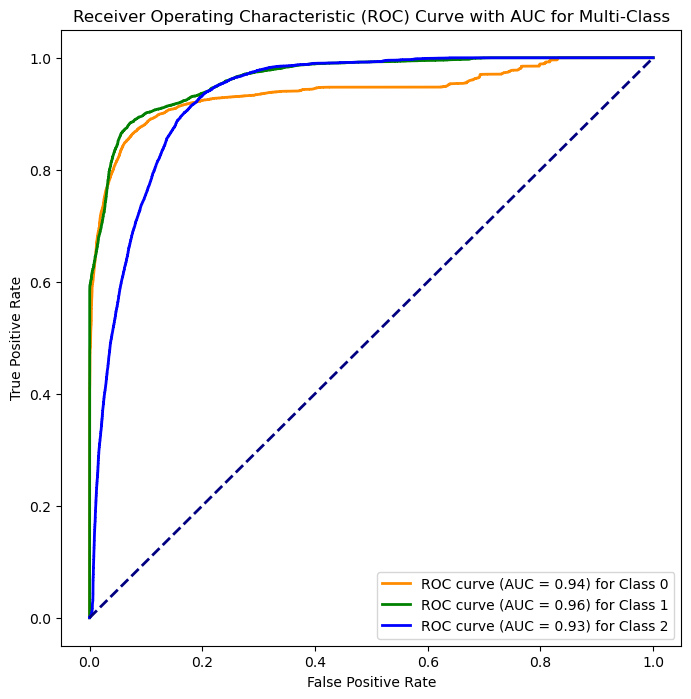

Cross-Validation Results:
Individual Fold Accuracies: [0.8378245051489178, 0.8371215391256089, 0.8376991761629915, 0.835343594297272, 0.8350846036209363]
Mean Accuracy: 0.8366146836711452


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Define the logistic regression model
logreg = LogisticRegression(random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # regularization parameter
    'penalty': ['l1', 'l2']  # regularization type
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(opt_X_train, y_train_std)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model from the grid search
best_logreg = grid_search.best_estimator_

# Make predictions on the training and test sets using the best model
y_train_pred = best_logreg.predict(opt_X_train)
y_test_pred = best_logreg.predict(opt_X_test)

# Evaluate the best model
accuracy_train = accuracy_score(y_train_std, y_train_pred)
accuracy_test = accuracy_score(y_test_std, y_test_pred)

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_std, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test_std, y_test_pred))

# Extract values from confusion matrix
conf_mat = confusion_matrix(y_test_std, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_mat)

# For multi-class classification, you can still calculate precision, recall, and F1-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test_std, y_test_pred, average='weighted')

# Print individual values
print("\nIndividual Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", fscore)
print("Accuracy:", accuracy_test)

# ROC Curve and AUC for Multi-Class Classification
y_test_prob = best_logreg.predict_proba(opt_X_test)
n_classes = y_test_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_std == i, y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
colors = ['darkorange', 'green', 'blue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with AUC for Multi-Class')
plt.legend(loc="lower right")
plt.show()

def cross_val_score_without_parallel(model, X, y, cv):
    scores = []
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    
    for train, test in cv.split(X_array, y_array):
        model.fit(X_array[train], y_array[train])
        y_pred = model.predict(X_array[test])
        accuracy = accuracy_score(y_array[test], y_pred)
        scores.append(accuracy)
    
    return scores

# Cross-validation without parallelization
n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score_without_parallel(best_logreg, opt_X_train, y_train_std, cv=stratified_kfold)

# Print cross-validation results
print("Cross-Validation Results:")
print("Individual Fold Accuracies:", cross_val_results)
print("Mean Accuracy:", sum(cross_val_results) / len(cross_val_results))






KNN Clustering

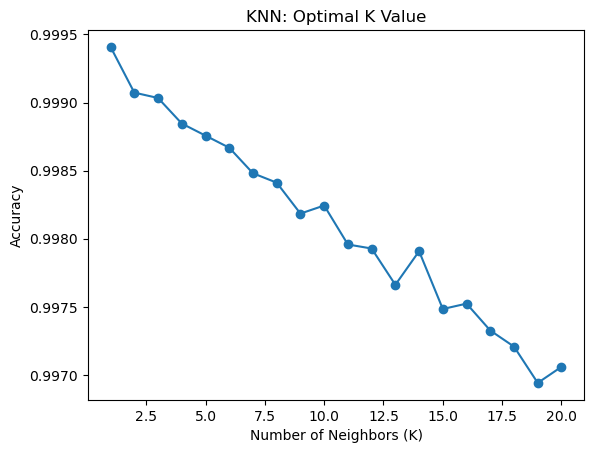

Best K value: 1


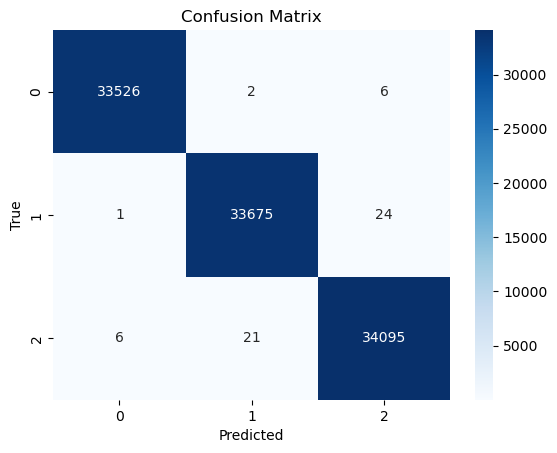

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, auc, roc_curve,precision_score,recall_score,f1_score
# Choose a range of K values
k_values = range(1, 21)

# Evaluate performance for each K
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(opt_X_train, y_train_std)
    y_pred = knn.predict(opt_X_test)
    accuracy = accuracy_score(y_test_std, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Optimal K Value')
plt.show()

# Best K value
best_k = k_values[np.argmax(accuracy_scores)]
# print(f"Best K value: {best_k}")

# Train KNN with the best K value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(opt_X_train, y_train_std)
y_pred_best = best_knn.predict(opt_X_test)

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Grid Search

Best Parameters: {'var_smoothing': 1e-06}
Confusion Matrix:
[[27965  2302  3267]
 [  200 28113  5387]
 [ 4055  1072 28995]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     33534
           1       0.89      0.83      0.86     33700
           2       0.77      0.85      0.81     34122

    accuracy                           0.84    101356
   macro avg       0.84      0.84      0.84    101356
weighted avg       0.84      0.84      0.84    101356


Confusion Matrix:
[[27965  2302  3267]
 [  200 28113  5387]
 [ 4055  1072 28995]]

Individual Metrics:
Precision: 0.8432954498360175
Recall: 0.8393484352184379
F1-Score: 0.8402201178946929
Accuracy: 0.8388156596550772


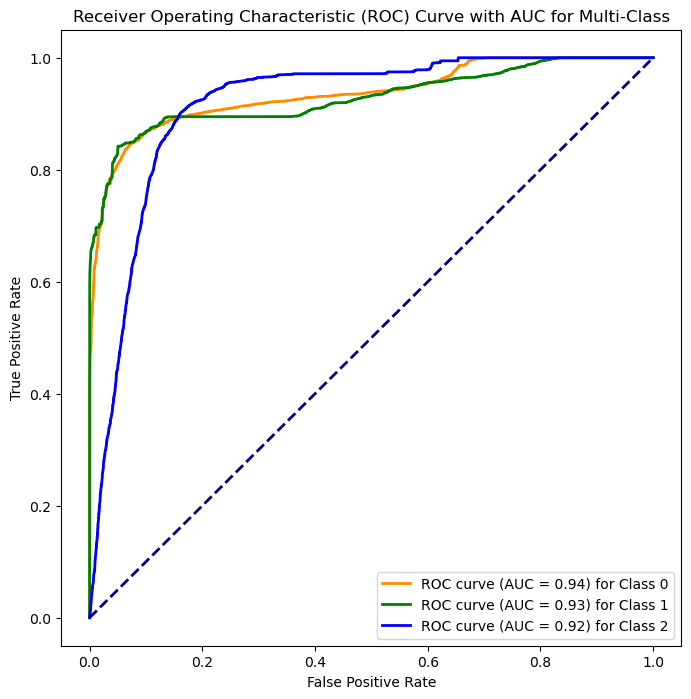

Cross-Validation Results:
Individual Fold Accuracies: [0.8387124622309922, 0.838256150952704, 0.8378595037245326, 0.8370948645848749, 0.8375758472694983]
Mean Accuracy: 0.8378997657525205


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
# from sklearn.metrics import plot_roc_curve, accuracy_score


# Assuming you have defined opt_X_train, y_train_std, opt_X_test, and y_test_std

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "var_smoothing": np.logspace(0, -9, num=100),
}

nb_classifier = GaussianNB()
grid_search = GridSearchCV(
    nb_classifier, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring="accuracy"
)

grid_search.fit(opt_X_train, y_train_std)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model from the grid search
best_nb_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_nb_classifier.predict(opt_X_test)

# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_std, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test_std, y_test_pred))

# Extract values from confusion matrix
conf_mat = confusion_matrix(y_test_std, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_mat)

# For multi-class classification, you can still calculate precision, recall, and F1-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test_std, y_test_pred, average='weighted')

# Print individual values
print("\nIndividual Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", fscore)
print("Accuracy:", accuracy_test)

# ROC Curve and AUC for Multi-Class Classification
y_test_prob = best_nb_classifier.predict_proba(opt_X_test)
n_classes = y_test_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_std == i, y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
colors = ['darkorange', 'green', 'blue']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with AUC for Multi-Class')
plt.legend(loc="lower right")
plt.show()

def cross_val_score_without_parallel(model, X, y, cv):
    scores = []
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    
    for train, test in cv.split(X_array, y_array):
        model.fit(X_array[train], y_array[train])
        y_pred = model.predict(X_array[test])
        accuracy = accuracy_score(y_array[test], y_pred)
        scores.append(accuracy)
    
    return scores

# Cross-validation without parallelization
n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score_without_parallel(best_nb_classifier, opt_X_train, y_train_std, cv=stratified_kfold)

# Print cross-validation results
print("Cross-Validation Results:")
print("Individual Fold Accuracies:", cross_val_results)
print("Mean Accuracy:", sum(cross_val_results) / len(cross_val_results))


Random Forest Classifier

In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Specify the value of alpha (adjusting for regularization)
max_depth_value = 5  # You can adjust this value

# Create a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=max_depth_value, random_state=42)
rf_classifier.fit(opt_X_train, y_train_std)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(opt_X_test)

# Evaluate the accuracy
accuracy_rf = accuracy_score(y_test_std, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')



# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_std, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test_std, y_test_pred))

# Extract values from confusion matrix
conf_mat = confusion_matrix(y_test_std, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_mat)

# For multi-class classification, you can still calculate precision, recall, and F1-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test_std, y_test_pred, average='weighted')

# Print individual values
print("\nIndividual Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", fscore)
print("Accuracy:", accuracy_test)

# ROC Curve and AUC for Multi-Class Classification
y_test_prob = rf_classifier.predict_proba(opt_X_test)
n_classes = y_test_prob.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_std == i, y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
# plt.figure(figsize=(8, 8))
# colors = ['darkorange', 'green', 'blue']  # Adjust colors as needed
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve with AUC for Multi-Class')
# plt.legend(loc="lower right")
# plt.show()

def cross_val_score_without_parallel(model, X, y, cv):
    scores = []
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    
    for train, test in cv.split(X_array, y_array):
        model.fit(X_array[train], y_array[train])
        y_pred = model.predict(X_array[test])
        accuracy = accuracy_score(y_array[test], y_pred)
        scores.append(accuracy)
    
    return scores

# Cross-validation without parallelization
n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score_without_parallel(rf_classifier, opt_X_train, y_train_std, cv=stratified_kfold)

# Print cross-validation results
print("Cross-Validation Results:")
print("Individual Fold Accuracies:", cross_val_results)
print("Mean Accuracy:", sum(cross_val_results) / len(cross_val_results))

Random Forest Accuracy: 0.9272761356012471
Confusion Matrix:
[[27965  2302  3267]
 [  200 28113  5387]
 [ 4055  1072 28995]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     33534
           1       0.89      0.83      0.86     33700
           2       0.77      0.85      0.81     34122

    accuracy                           0.84    101356
   macro avg       0.84      0.84      0.84    101356
weighted avg       0.84      0.84      0.84    101356


Confusion Matrix:
[[27965  2302  3267]
 [  200 28113  5387]
 [ 4055  1072 28995]]

Individual Metrics:
Precision: 0.8432954498360175
Recall: 0.8393484352184379
F1-Score: 0.8402201178946929
Accuracy: 0.8388156596550772
Cross-Validation Results:
Individual Fold Accuracies: [0.9211321452796448, 0.9200591971388049, 0.9184549356223176, 0.9217354841892359, 0.9254723496620788]
Mean Accuracy: 0.9213708223784163


Neural Networks

In [73]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/50
12670/12670 [==============================] - 9s 662us/step - loss: 0.0645 - accuracy: 0.9759 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/50
12670/12670 [==============================] - 8s 644us/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.0298e-04 - val_accuracy: 1.0000
Epoch 3/50
12670/12670 [==============================] - 8s 641us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 3.7580e-04 - val_accuracy: 0.9999
Epoch 4/50
12670/12670 [==============================] - 9s 683us/step - loss: 8.0591e-04 - accuracy: 0.9998 - val_loss: 2.6284e-05 - val_accuracy: 1.0000
Epoch 5/50
12670/12670 [==============================] - 10s 750us/step - loss: 6.7680e-04 - accuracy: 0.9998 - val_loss: 1.2861e-05 - val_accuracy: 1.0000
Epoch 6/50
12670/12670 [==============================] - 8s 653us/step - loss: 4.5418e-04 - accuracy: 0.9999 - val_loss: 7.4965e-06 - val_accuracy: 1.0000
Epoch 7/50
12670/12670 [==============================] - 9s 731us/step - loss:

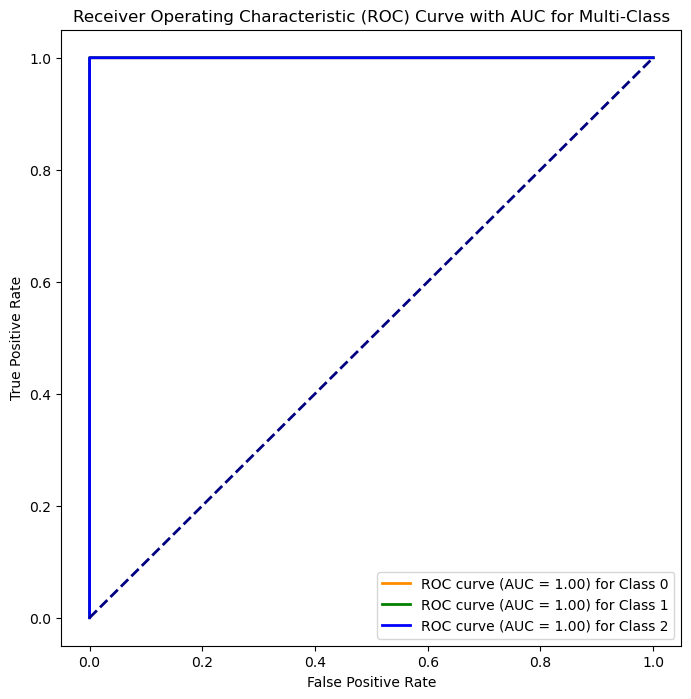

In [75]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, auc, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming opt_X_train, y_train_std, opt_X_test, y_test_std are defined

# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(opt_X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd' or 'rmsprop'
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

# Train the model
model.fit(opt_X_train, y_train_std, epochs=50, batch_size=32, validation_data=(opt_X_test, y_test_std))

# Evaluate the model on the test set
y_pred_prob = model.predict(opt_X_test)
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_std, y_pred))

# Extract values from confusion matrix
conf_mat = confusion_matrix(y_test_std, y_pred)

# For multi-class classification, you can still calculate precision, recall, and F1-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test_std, y_pred, average='weighted')

# ROC Curve and AUC for Multi-Class Classification
n_classes = len(np.unique(y_test_std))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_true_class = (y_test_std == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])





